<a href="https://colab.research.google.com/github/piyush02nir/Company-Bankruptcy-Prediction/blob/main/Company_Bankruptcy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Company Bankruptcy



##### **Project Type**    -Classification
##### **Contribution**    - Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.


# <font color="sky blue"> **Problem Statement**</font><hr color="grey">
Prediction of bankruptcy is a phenomenon of increasing interest to firms who stand to loose money because on unpaid debts. Since computers can store huge dataset pertaining to bankruptcy making accurate predictions from them before hand is becoming important.

The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

In this project you will use various classification algorithms on bankruptcy dataset to predict bankruptcies with satisfying accuracies long before the actual event.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [101]:
# Import Libraries
#Importing required libraries for EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from random import randint
import math

import plotly.express as px
from matplotlib.pyplot import figure, savefig, show, show, subplots, Axes, title
from scipy.stats import norm
import plotly.graph_objects as go
import plotly.figure_factory as ff
import missingno as msno 

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, accuracy_score, recall_score, classification_report, f1_score, average_precision_score, precision_recall_fscore_support, roc_auc_score)
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.utils import class_weight
from sklearn.feature_selection import RFE
!pip install shap==0.40.0
import shap 

from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.isotonic import IsotonicRegression

# default='warn'. suppresing unnecessary warnings
import warnings
warnings.filterwarnings('ignore')
sns.set_style("white")
#For showing all outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Noting the starting time of the code execution.
t1 = time.time()

#setting the notebook.
pd.options.mode.chained_assignment = None  
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


### Dataset Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Dataset(shivank)
#df_company=pd.read_csv('/content/drive/MyDrive/COMPANY BANKRUPTCY PREDICTION.csv')

In [5]:
#path of the required csv files. (Piyush)
df_company = pd.read_csv('/content/drive/MyDrive/Capstone_Company_Bankruptcy_Prediction/Data_Source/COMPANY BANKRUPTCY PREDICTION.csv')

In [6]:
#path of the required csv files. (Neel)
#df_company = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Project III/Data/COMPANY BANKRUPTCY PREDICTION.csv')

### Dataset First View

In [7]:
# Dataset First Look
print('------------------------------------Head---------------------------------------\n')
df_company.head()            #checking 1st 5 rows of the df

print('\n------------------------------------Tail---------------------------------------\n')
df_company.tail()            #checking last 5 rows of the df


------------------------------------Head---------------------------------------



Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.780985             1.256969e-04   
1                               0.781506             2.897851e-04   
2                               0.780284             2.361297e-04   
3                               0.781241             1.078888e-04   
4                               0.781550             7.890000e+09   

    Research and development expense rate   Cash flow rate  \
0                                     0.0         0.458143   
1                                     0.0         0.461867   
2                              25500000.0         0.458521   
3                                     0.0         0.465705   
4                                     0.0         0.462746   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000725            0.0   
1                              0.000647            0.0   
2                              0.000790            0.0   
3                              0.000449            0.0   
4                              0.000686            0.0   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.147950                  0.147950   
1                  0.182251                  0.182251   
2                  0.177911                  0.177911   
3                  0.154187                  0.154187   
4                  0.167502                  0.167502   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.147950                                  0.169141   
1                  0.182251                                  0.208944   
2                  0.193713                     


------------------------------------Tail---------------------------------------



Bankrupt?   ROA(C) before interest and depreciation before interest  \
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
6814                      0.809331   
6815                      0.809327   
6816                      0.809317   
6817                      0.809399   
6818                      0.813800   

       Non-industry income and expenditure/revenue  \
6814                                      0.303510   
6815                                      0.303520   
6816                                      0.303512   
6817                                      0.303498   
6818                                      0.313415   

       Continuous interest rate (after tax)   Operating Expense Rate  \
6814                               0.781588             1.510213e-04   
6815                               0.781586             5.220000e+09   
6816                               0.781546             2.509312e-04   
6817                               0.781663             1.236154e-04   
6818                               0.786079             1.431695e-03   

       Research and development expense rate   Cash flow rate  \
6814                            4.500000e+09         0.463734   
6815                            1.440000e+09         0.461978   
6816                            1.039086e-04         0.472189   
6817                            2.510000e+09         0.476123   
6818                            0.000000e+00         0.427721   

       Interest-bearing debt interest rate   Tax rate (A)  \
6814                          1.790179e-04       0.113372   
6815                          2.370237e-04       0.371596   
6816                          0.000000e+00       0.490839   
6817                          2.110211e-04       0.181294   
6818                          5.900000e+08       0.000000   

       Net Value Per Share (B)   Net Value Per Share (A)  \
6814                  0.175045                  0.175045   
6815                  0.181324                  0.181324   
6816                  0.269521                  0.269521   
6817                  0.213392                  0.213392   
6818                  0.220766                  0.220766   

       Net Value Per Share (C)   Persiste

### Dataset Rows & Columns count

In [8]:
print('\n------------------------------------Shape-------------------------------------\n')
                              #no. of rows and columns
print(f'Rows: {df_company.shape[0]}, Columns: {df_company.shape[1]}\n')  


------------------------------------Shape-------------------------------------

Rows: 6819, Columns: 96



### Dataset Information

In [9]:
print('------------------------------------Info--------------------------------------\n')
df_company.info()            #information about the df

------------------------------------Info--------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rat

In [10]:
# data description
df_company.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  \
count                                   6819.000000   
mean                                       0.303623   
std                                        0.011163   
min                                        0.000000   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303585   
max                                        1.000000   

        Continuous interest rate (after tax)   Operating Expense Rate  \
count                            6819.000000             6.819000e+03   
mean                                0.781381             1.995347e+09   
std                                 0.012679             3.237684e+09   
min                 

#### Duplicate Values

In [11]:
# To find the duplicate values
df_company.duplicated().sum()

0

This data set does'nt contain any duplicate rows.

#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
df_company.isnull().values.any()

False

In [13]:
print('Total number of null value is :',df_company.isnull().sum().max())

Total number of null value is : 0


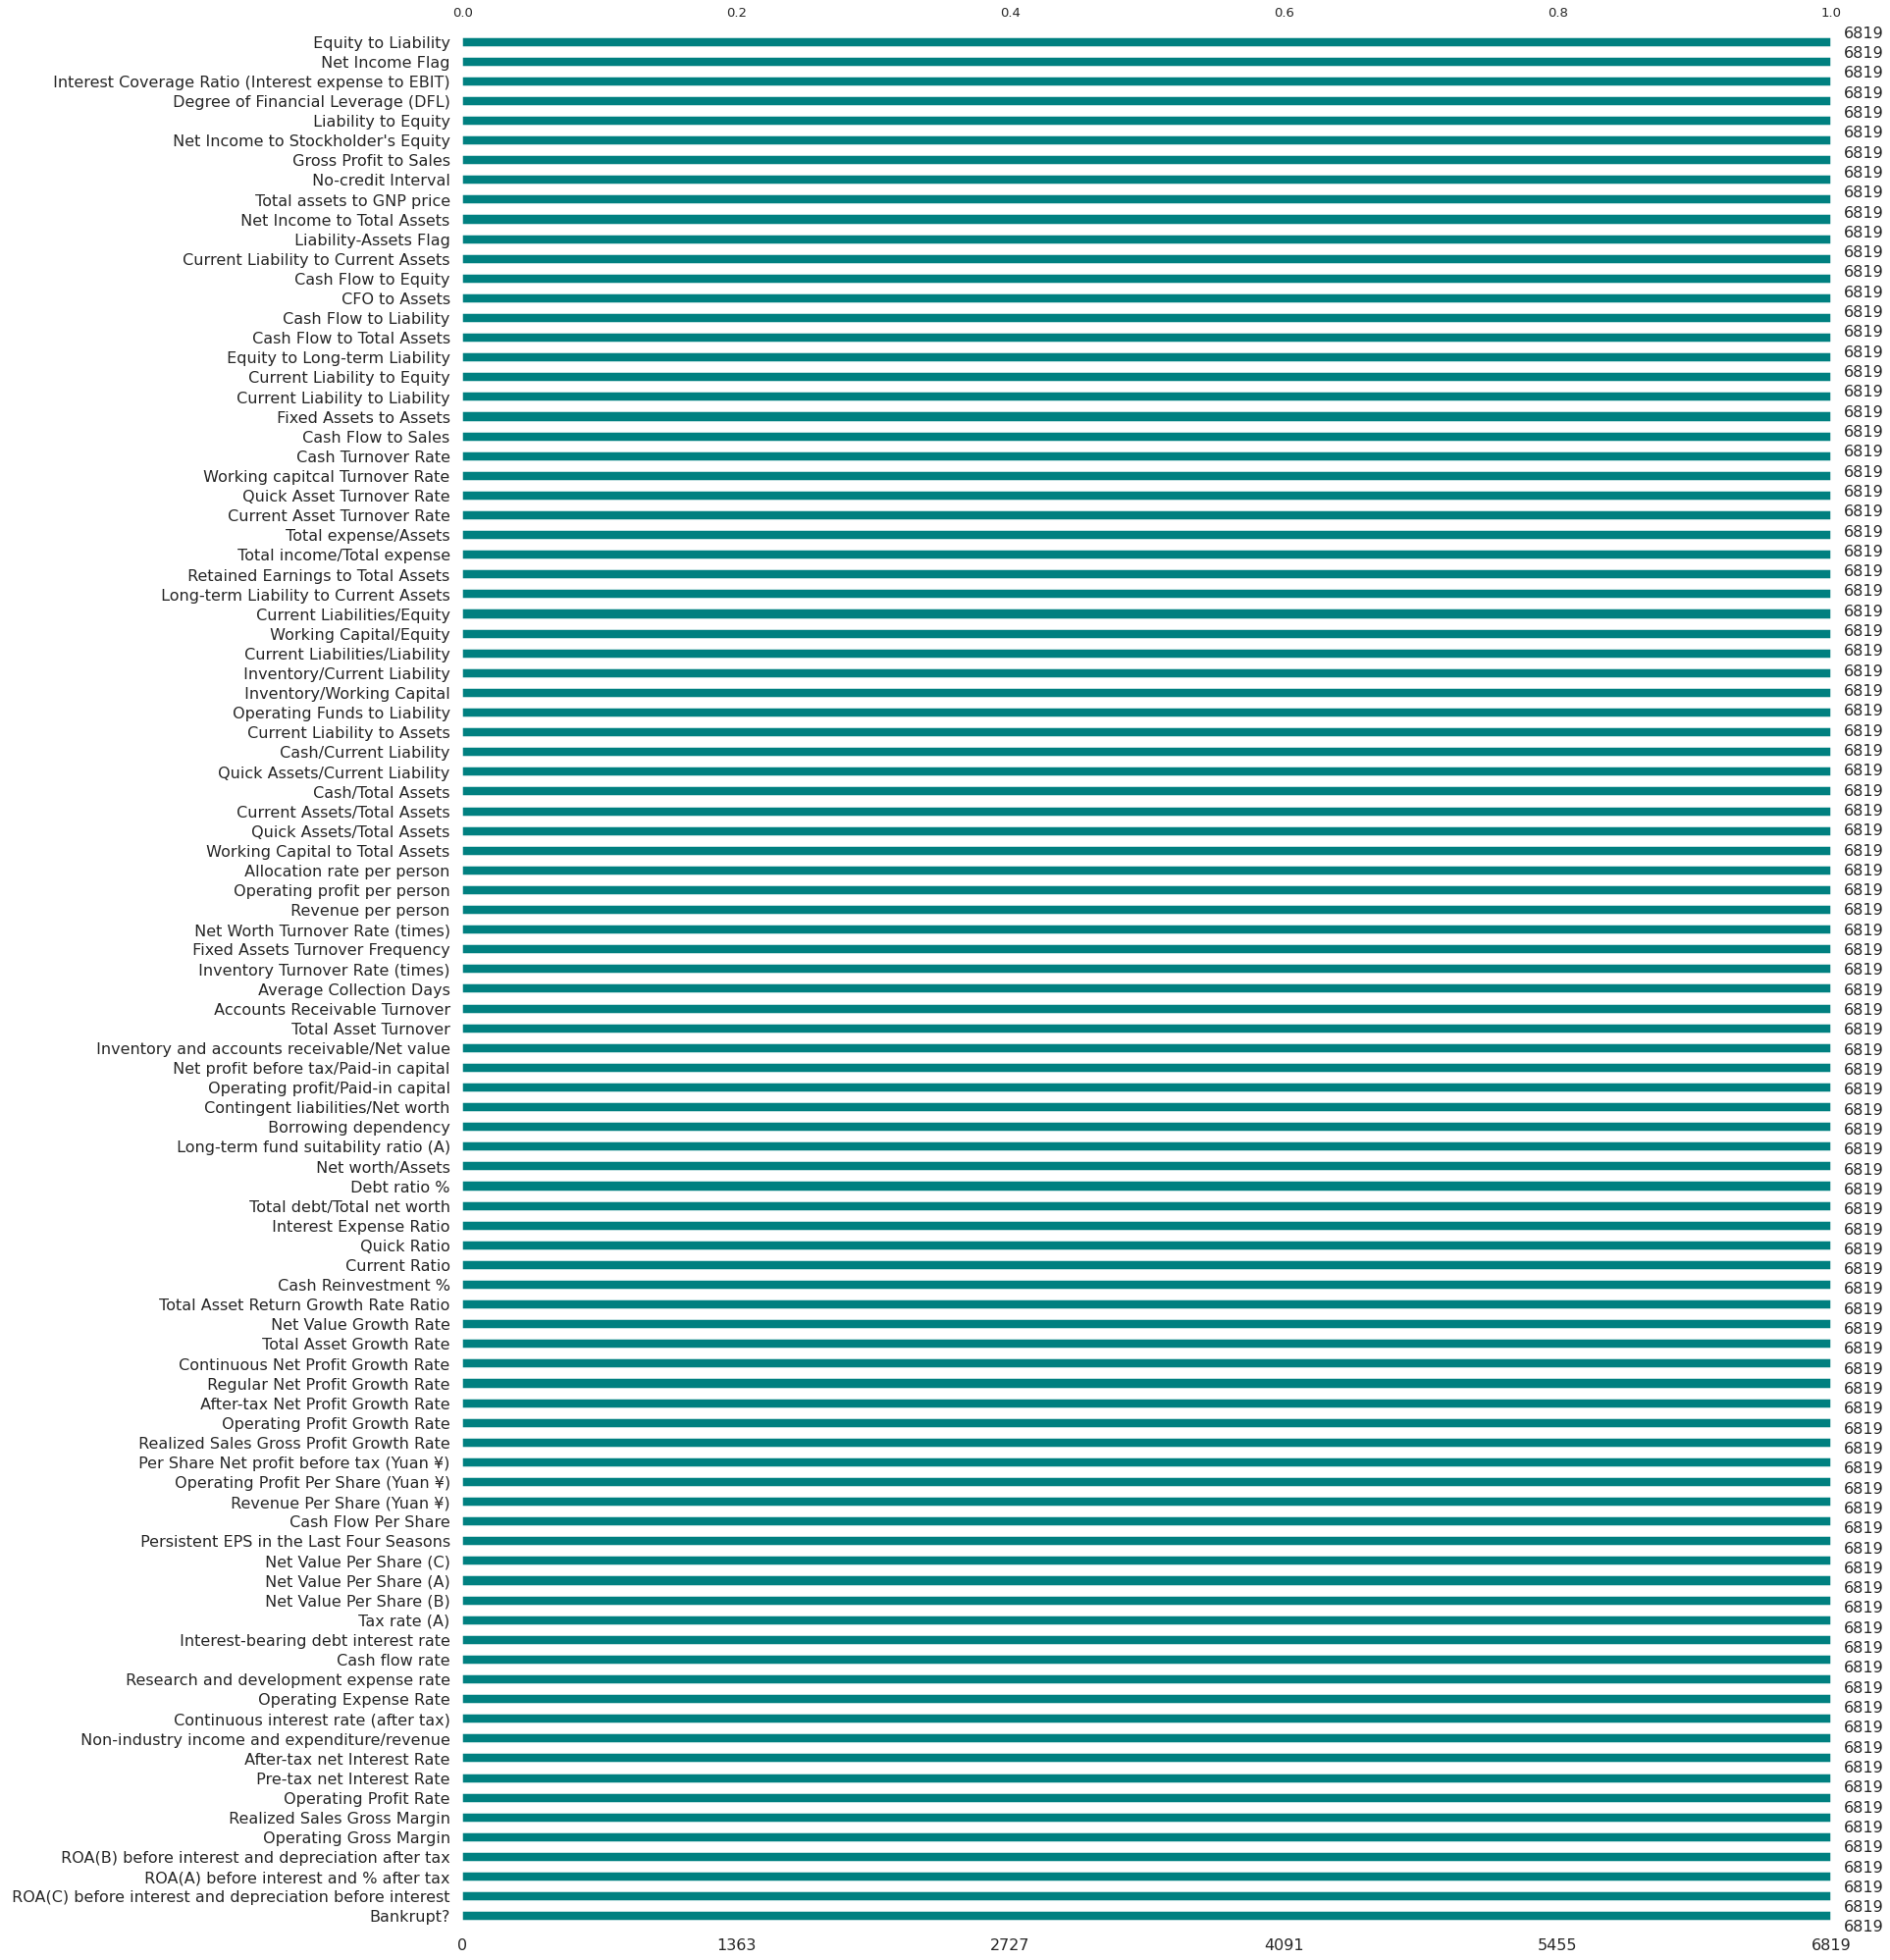

In [100]:
# Visualizing the missing values
msno.bar(df_company, color="Teal")

### What did you know about your dataset?



*   There are total 96 differet variables.
*   Bankruptcy is our dependent variable.
*   There are no missing or null values.
*   There are total 6819 rows of data.
*   There were no duplicate values found.


I. Fortunately we don't have any missing values, inspecting missing values    using isnull() and missingno function gave the same result. By visualization we see that in each column we have 6819 non null values.

II. The dataset has 6819 rows and 96 columns, there are 95 dimensions in data, leaving column 'Bankrupt?' which is the target to predict, regarded as the y of data.

III. The 'Bankrupt?' column consists of label '1' and '0', and the label '1' points to the bankrupt condition of company, the label '0' means not bankrupt. The number of bankrupt company : not bankrupt company =1:30, as we turn it into binary classifier problem.

IV. Missing value analysis, According to the statistics, there are no missing values in 95 feature columns, which have relatively complete features and little interference to model prediction. So instead of removing any of the original features, we use automatic model selection, as the model can automatically assign wiehgt of the features.





## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
df_company.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [16]:
# Dataset Describe
df_company.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  \
count                                   6819.000000   
mean                                       0.303623   
std                                        0.011163   
min                                        0.000000   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303585   
max                                        1.000000   

        Continuous interest rate (after tax)   Operating Expense Rate  \
count                            6819.000000             6.819000e+03   
mean                                0.781381             1.995347e+09   
std                                 0.012679             3.237684e+09   
min                 

### Variables Description 

* The features in the data set and their description are:

* Bankrupt?: Class label 1 : Yes , O: No


* ROA(C) before interest and depreciation before interest: Return On Total Assets(C)


* ROA(A) before interest and % after tax: Return On Total Assets(A)


* ROA(B) before interest and depreciation after tax: Return On Total Assets(B)


* Operating Gross Margin: Gross Profit/Net Sales


* Realized Sales Gross Margin: Realized Gross Profit/Net Sales


* Operating Profit Rate: Operating Income/Net Sales


* Pre-tax net Interest Rate: Pre-Tax Income/Net Sales


* After-tax net Interest Rate: Net Income/Net Sales


* Non-industry income and expenditure/revenue: Net Non-operating Income Ratio


* Continuous interest rate (after tax): Net Income-Exclude Disposal Gain or Loss/Net Sales


* Operating Expense Rate: Operating Expenses/Net Sales


* Research and development expense rate: (Research and Development Expenses)/Net Sales


* Cash flow rate: Cash Flow from Operating/Current Liabilities


* Interest-bearing debt interest rate: Interest-bearing Debt/Equity


* Tax rate (A): Effective Tax Rate


* Net Value Per Share (B): Book Value Per Share(B)


* Net Value Per Share (A): Book Value Per Share(A)


* Net Value Per Share (C): Book Value Per Share(C)


* Persistent EPS in the Last Four Seasons: EPS-Net Income


* Cash Flow Per Share


* Revenue Per Share (Yuan ¥): Sales Per Share


* Operating Profit Per Share (Yuan ¥): Operating Income Per Share


* Per Share Net profit before tax (Yuan ¥): Pretax Income Per Share


* Realized Sales Gross Profit Growth Rate


* Operating Profit Growth Rate: Operating Income Growth


* After-tax Net Profit Growth Rate: Net Income Growth


* Regular Net Profit Growth Rate: Continuing Operating Income after Tax Growth


* Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss 
  Growth


* Total Asset Growth Rate: Total Asset Growth


* Net Value Growth Rate: Total Equity Growth


* Total Asset Return Growth Rate Ratio: Return on Total Asset Growth


* Cash Reinvestment %: Cash Reinvestment Ratio


* Current Ratio


* Quick Ratio: Acid Test


* Interest Expense Ratio: Interest Expenses/Total Revenue


* Total debt/Total net worth: Total Liability/Equity Ratio


* Debt ratio %: Liability/Total Assets


* Net worth/Assets: Equity/Total Assets


* Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets


* Borrowing dependency: Cost of Interest-bearing Debt


* Contingent liabilities/Net worth: Contingent Liability/Equity


* Operating profit/Paid-in capital: Operating Income/Capital


* Net profit before tax/Paid-in capital: Pretax Income/Capital


* Inventory and accounts receivable/Net value: (Inventory+Accounts Receivables)/Equity


* Total Asset Turnover


* Accounts Receivable Turnover


* Average Collection Days: Days Receivable Outstanding


* Inventory Turnover Rate (times)


* Fixed Assets Turnover Frequency


* Net Worth Turnover Rate (times): Equity Turnover


* Revenue per person: Sales Per Employee


* Operating profit per person: Operation Income Per Employee


* Allocation rate per person: Fixed Assets Per Employee


* Working Capital to Total Assets


* Quick Assets/Total Assets


* Current Assets/Total Assets


* Cash/Total Assets


* Quick Assets/Current Liability


* Cash/Current Liability


* Current Liability to Assets


* Operating Funds to Liability


* Inventory/Working Capital


* Inventory/Current Liability


* Current Liabilities/Liability


* Working Capital/Equity


* Current Liabilities/Equity


* Long-term Liability to Current Assets


* Retained Earnings to Total Assets


* Total income/Total expense


* Total expense/Assets


* Current Asset Turnover Rate: Current Assets to Sales


* Quick Asset Turnover Rate: Quick Assets to Sales


* Working capitcal Turnover Rate: Working Capital to Sales


* Cash Turnover Rate: Cash to Sales


* Cash Flow to Sales


* Fixed Assets to Assets


* Current Liability to Liability


* Current Liability to Equity


* Equity to Long-term Liability


* Cash Flow to Total Assets


* Cash Flow to Liability


* CFO to Assets


* Cash Flow to Equity


* Current Liability to Current Assets


* Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise


* Net Income to Total Assets


* Total assets to GNP price


* No-credit Interval


* Gross Profit to Sales


* Net Income to Stockholder's Equity


* Liability to Equity


* Degree of Financial Leverage (DFL)


* Interest Coverage Ratio (Interest expense to EBIT)


* Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise


* Equity to Liability

Answer Here

*   There only 3 discrete data namely Bankruptcy? ,Liability-Assets Flag, Net income flag.
*   Bankruptcy is the dependent variable and rest are independent variables.



### Check Unique Values for each variable.

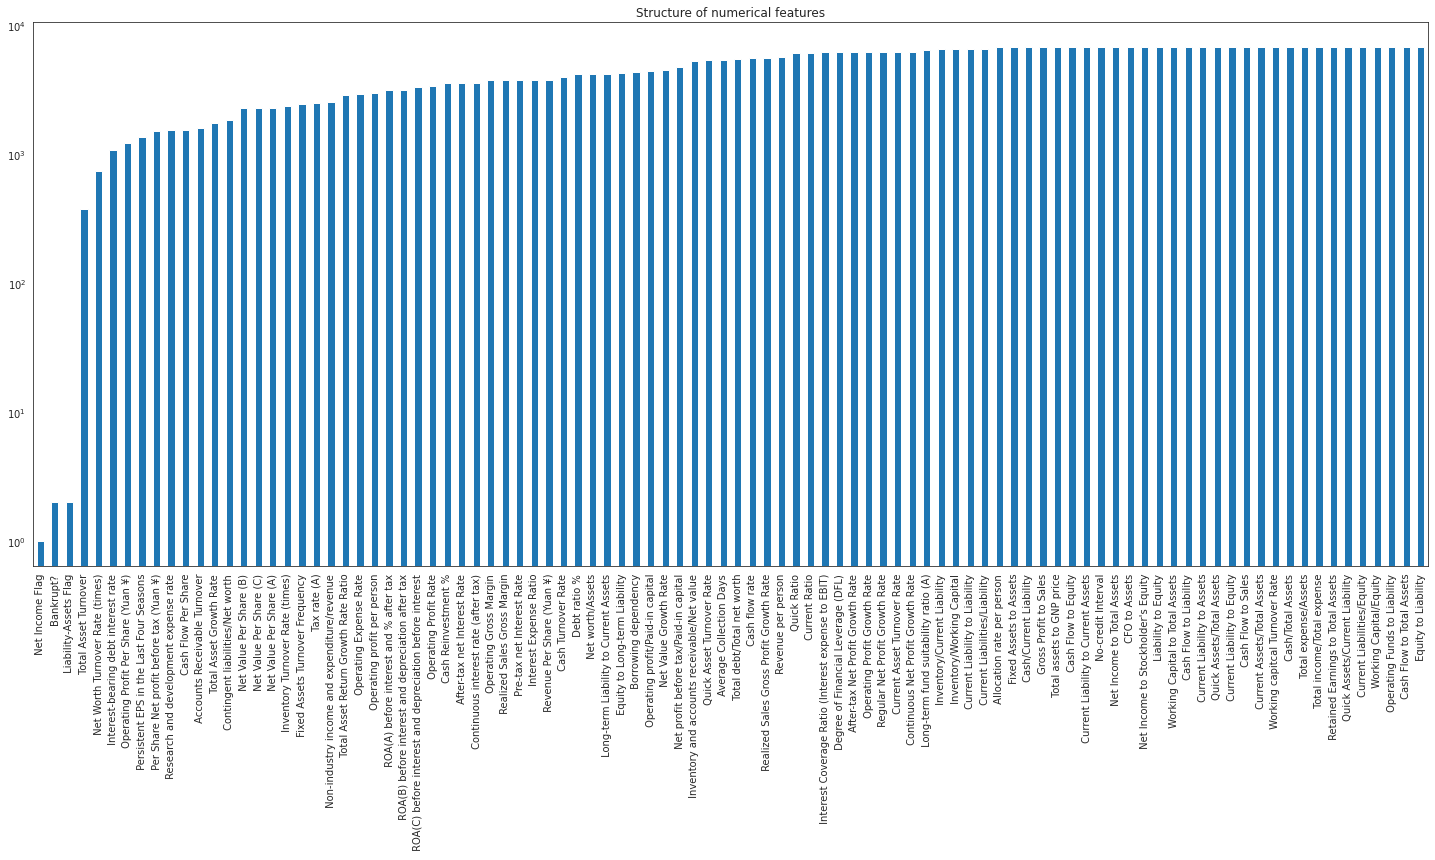

In [17]:
# Check Unique Values for each variable.

unique_values = df_company.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(25, 10), title="Structure of numerical features")

#Structure of numerical features

This process will give us some insights about the number of binary (2 unique values), ordinal (3 to ~10 unique values) and continuous (more than 10 unique values) features in the dataset.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
# Write your code to make your dataset analysis ready.
df_company_new=df_company.copy()
print("No. of Bankrupt companies -",len(df_company_new[df_company_new['Bankrupt?']==1]))

No. of Bankrupt companies - 220


<Figure size 648x432 with 0 Axes>

Text(0.5, 1.0, 'Class Distributions \n (0: Failed to go bankrupt || 1: Went bankrupt)')

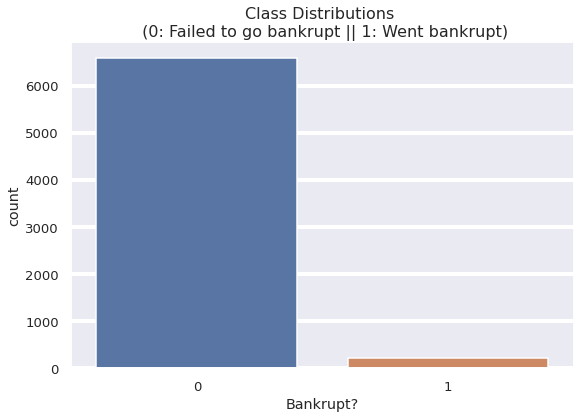

In [19]:
#analyzing Target variable (Class: 0 = Not Bankrupt, 1 = Bankrupt)

# Checking labels distributions

sns.set_theme(context = 'talk', style='darkgrid', palette='deep', font='sans-serif', font_scale = 0.8, rc={"grid.linewidth": 4})

plt.figure(figsize = (9,6))
sns.countplot(df_company_new['Bankrupt?'])
plt.title('Class Distributions \n (0: Failed to go bankrupt || 1: Went bankrupt)', fontsize=16)
plt.show()

Finding the insights, patterns and relations

In [20]:
flag_col = ['Bankrupt?', ' Net Income Flag']
other_col = [x for x in df_company_new.columns.to_list() if x not in ['Bankrupt?', ' Net Income Flag']]

In [21]:

numeric_features = df_company_new.dtypes[df_company_new.dtypes != 'int64'].index
categorical_features = df_company_new.dtypes[df_company_new.dtypes == 'int64'].index
cont_features=df_company_new.select_dtypes(include=[np.number,'float64','int64']).columns

df_company_new[categorical_features].columns.tolist()
     

['Bankrupt?', ' Liability-Assets Flag', ' Net Income Flag']

### What all manipulations have you done and insights you found?

There is a huge difference between bankrupt and non-bankrupt companies. As we can see that 96.8% of companies are non-bankrupt and 3.2% are bankrupt so now we must balance the data in order to build an ideal model capable of learning between the two types of companies.

Took sample from data to balance it and create new Date Frame. One way the imbalance may affect our Machine Learning algorithm is when our algorithm completely ignores the minority class. The reason this is an issue is because the minority class is often the class that we are most interested in.

The reason we identify imbalanced classification as a problem is because it can influence the performance on our Machine Learning algorithms.

There are only three categorical data columns, we will first explore these columns

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Bankrupt Distribution

In [102]:
# Chart - 1 visualization code
print(df_company_new['Bankrupt?'].value_counts())
labels = df_company_new['Bankrupt?'].unique()
values = df_company_new['Bankrupt?'].value_counts().sort_values(ascending = True)

fig = go.Figure(data = [
    go.Pie(
    labels = labels,
    values = values,title_text = "Bankrupt Distribution",
    hole = .5)
])

fig.show()

0    6599
1     220
Name: Bankrupt?, dtype: int64


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2  Pie Chart on Dependant Variable i.e., Bankrupt? (Univariate)

0    6599
1     220
Name: Bankrupt?, dtype: int64
 


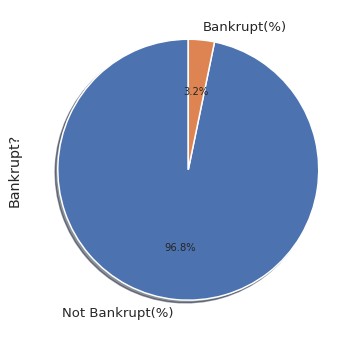

In [111]:
# Chart - 2 visualization code

# Dependant Column Value Counts
print(df_company_new['Bankrupt?'].value_counts())
print(" ")

# Dependant Variable Column Visualization
df_company_new['Bankrupt?'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not Bankrupt(%)','Bankrupt(%)'],
                              #  colors=['#00008B', '#74BBFB'],
                               explode=[0,0]
                              )
     

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3  Countplot on Categorical Variable i.e., Liability-Assets Flag (Univariate)

0    6811
1       8
Name:  Liability-Assets Flag, dtype: int64


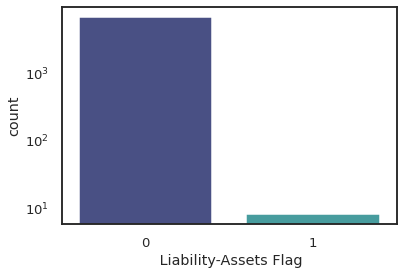

In [120]:
# Chart - 3 visualization code
print(df_company_new[' Liability-Assets Flag'].value_counts())
LAF_plot = sns.countplot(' Liability-Assets Flag',data=df_company_new,palette ='mako')
# change the y-axis scale to log
LAF_plot.set_yscale("log")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4 Countplot on Categorical Variable i.e., Net Income Flag (Univariate)

1    6819
Name:  Net Income Flag, dtype: int64


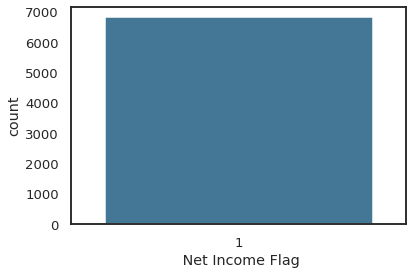

In [117]:
# Chart - 4 visualization code
print(df_company_new[' Net Income Flag'].value_counts())
sns.countplot(' Net Income Flag',data=df_company_new,palette = 'mako')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5  Countplot on Categorical Variable i.e., Liability-Assets Flag with Bankrupt (Bivariate)

 Liability-Assets Flag  Bankrupt?
0                       0            6597
                        1             214
1                       1               6
                        0               2
dtype: int64


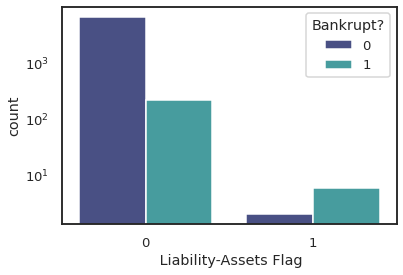

In [119]:
# Chart - 5 visualization code
print(df_company_new[[' Liability-Assets Flag','Bankrupt?']].value_counts())
LAFB_plot = sns.countplot(x = ' Liability-Assets Flag',hue = 'Bankrupt?',data = df_company_new,palette = 'mako')
# change the y-axis scale to log
LAFB_plot.set_yscale("log")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6  Countplot on Categorical Variable i.e., Net Income Flag with Bankrupt (Bivariate)

 Net Income Flag  Bankrupt?
1                 0            6599
                  1             220
dtype: int64


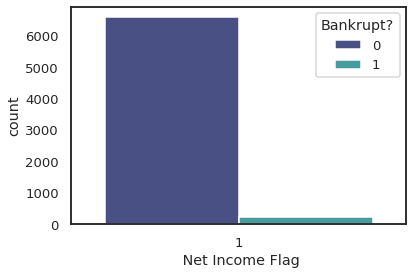

In [122]:
# Chart - 6 visualization code
print(df_company_new[[' Net Income Flag','Bankrupt?']].value_counts())
sns.countplot(x = ' Net Income Flag',hue = 'Bankrupt?',data = df_company_new,palette = 'mako')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7  Boxplot on Numerical Variable i.e., Operating Profit Rate with Bankrupt (Bivariate)

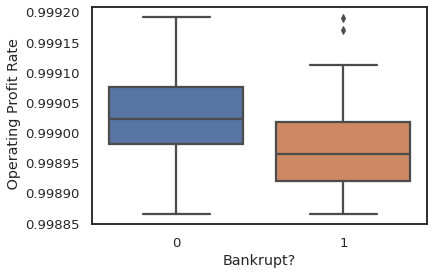

In [125]:
# Chart - 7 visualization code

q1,q9 = df_company_new[" Operating Profit Rate"].quantile([0.1,0.9])
mask=df_company_new[" Operating Profit Rate"].between(q1,q9)
sns.boxplot(x="Bankrupt?",y=" Operating Profit Rate", data=df_company_new[mask])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8  Column wise Histogram (Univariate)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2947b59b50>,
      dtype=object)

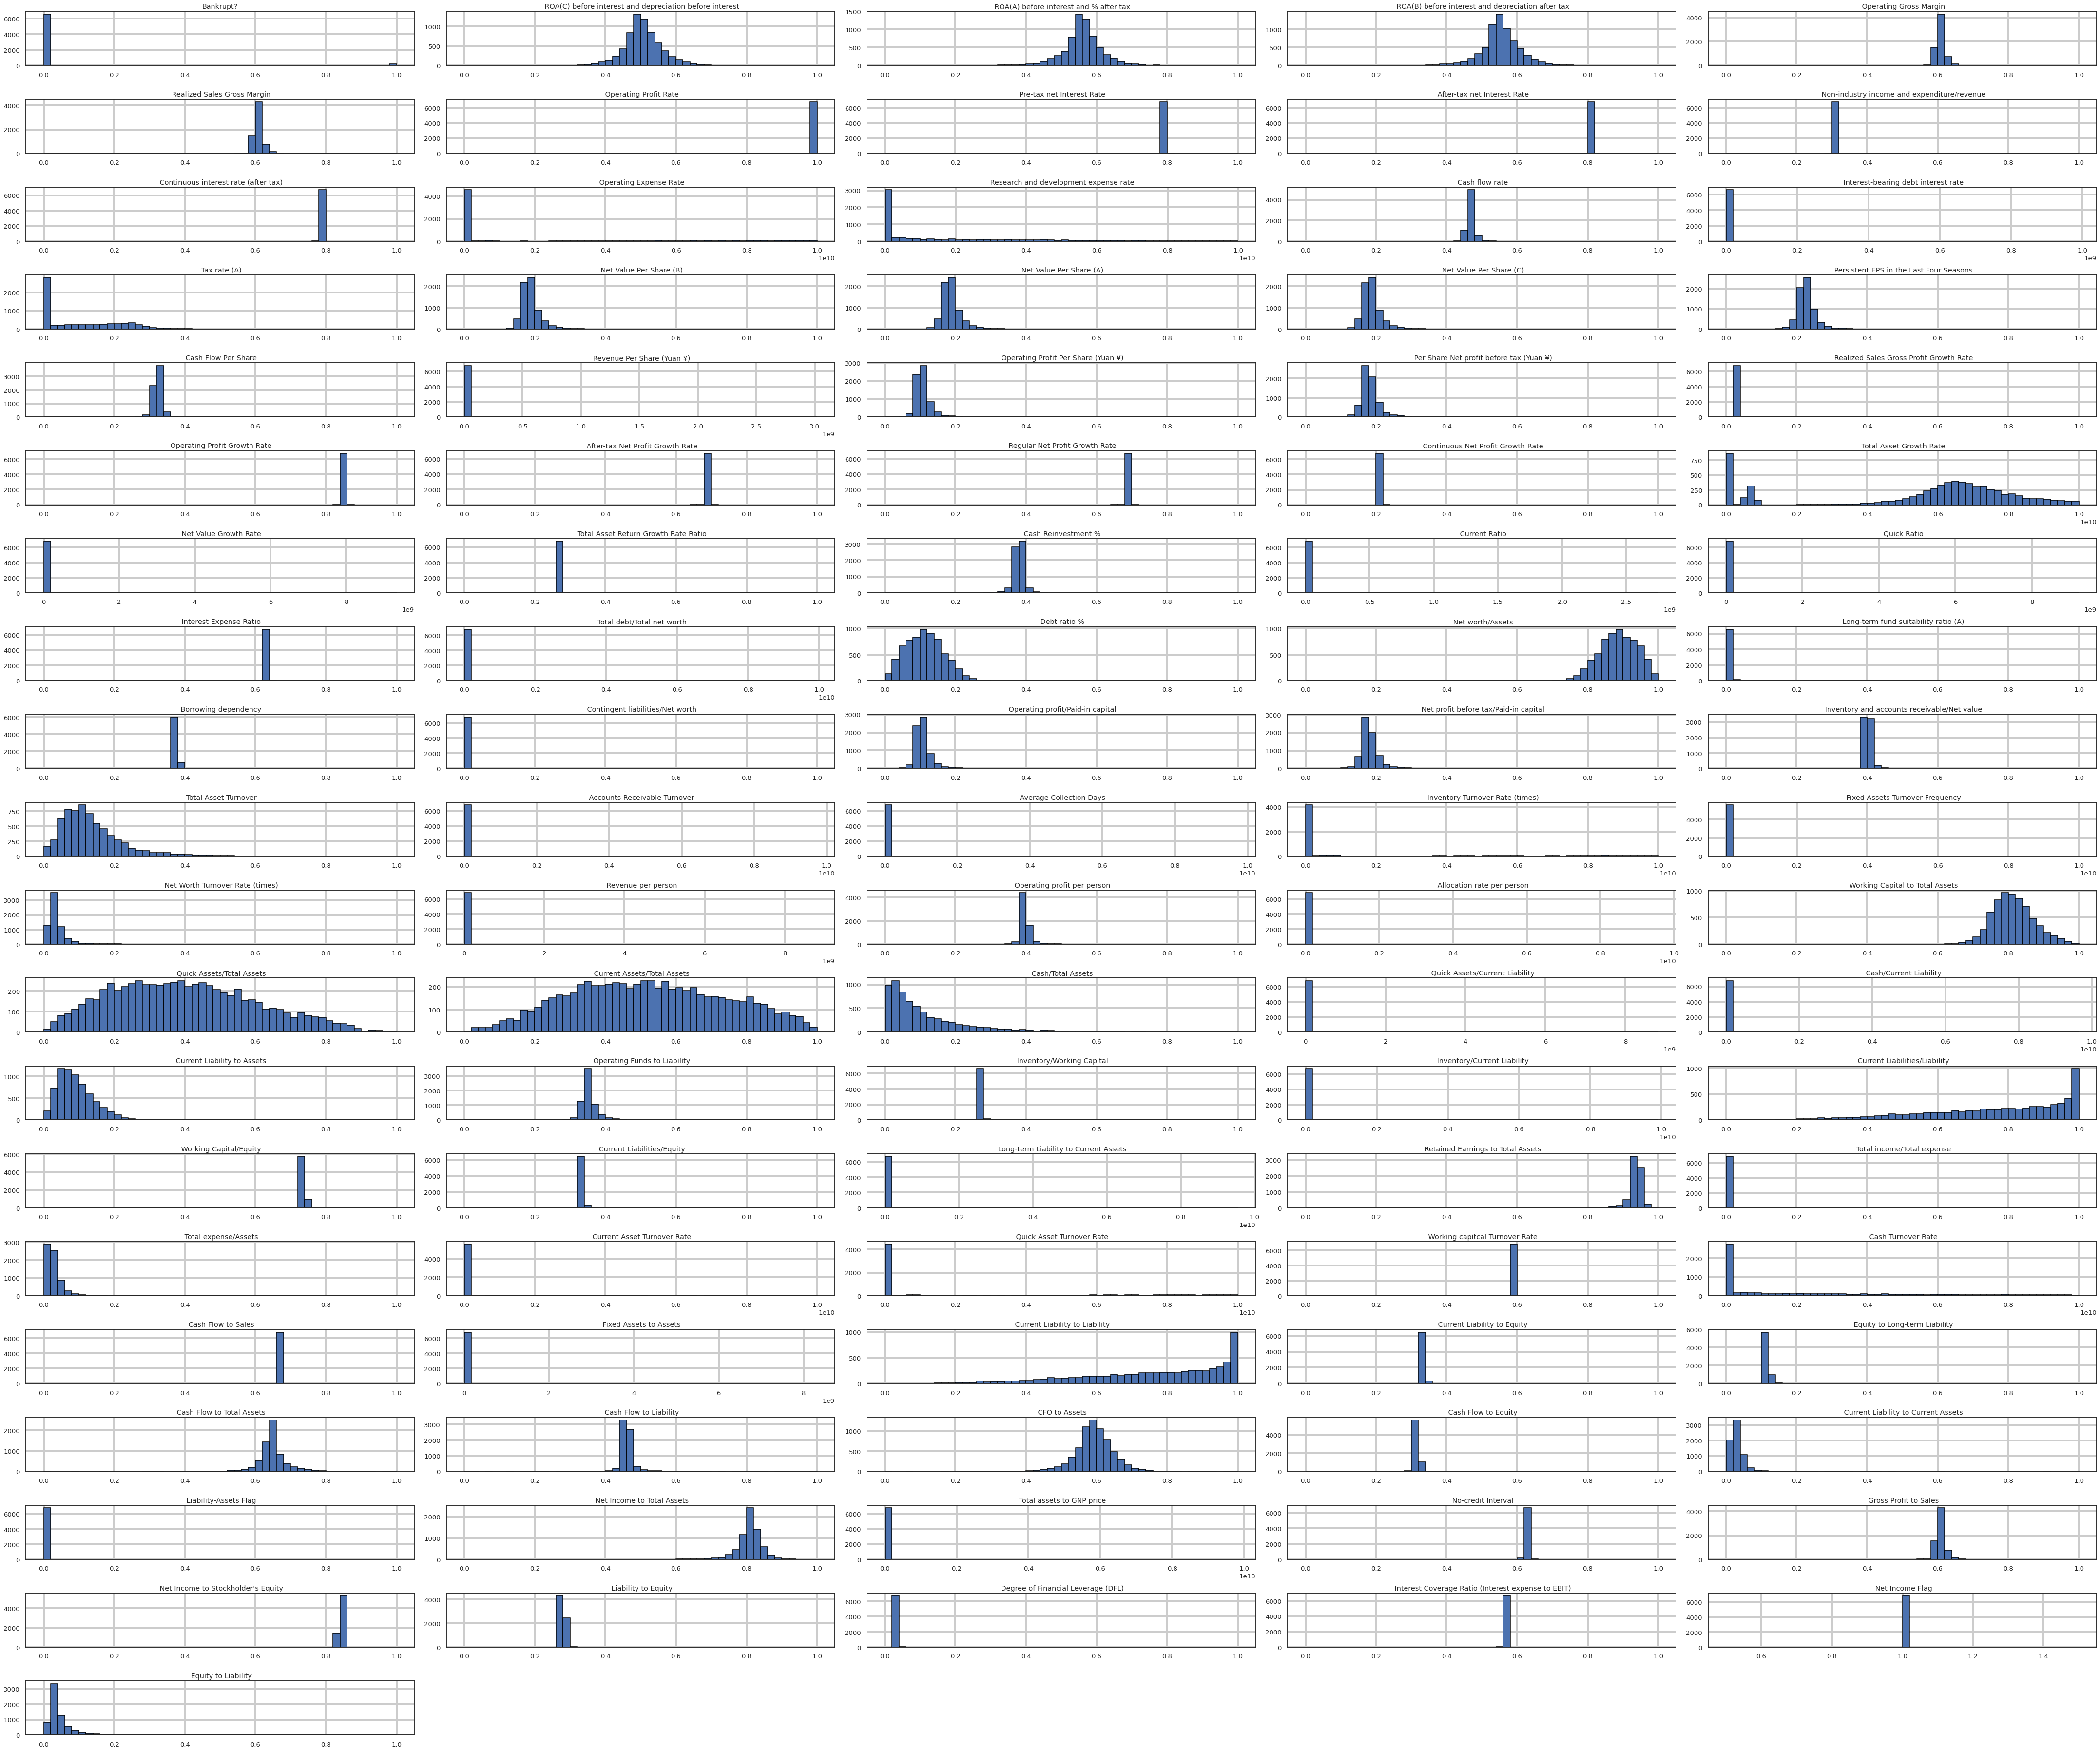

In [126]:
# Chart - 8 visualization code

df_company_new.hist(bins=50, figsize=(60, 50), layout=(-1, 5), edgecolor="black")

# change the y-axis scale to log
plt.gca().set_yscale('log')

plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9  Plotting interesting features using Boxplot(Bivariate)

Text(0.5, 1.0, 'Bankrupt Vs  Net Income to Total Assets')

Text(0.5, 1.0, 'Bankrupt Vs  Total debt/Total net worth')

Text(0.5, 1.0, 'Bankrupt Vs  Debt ratio %')

Text(0.5, 1.0, 'Bankrupt Vs  Net worth/Assets')

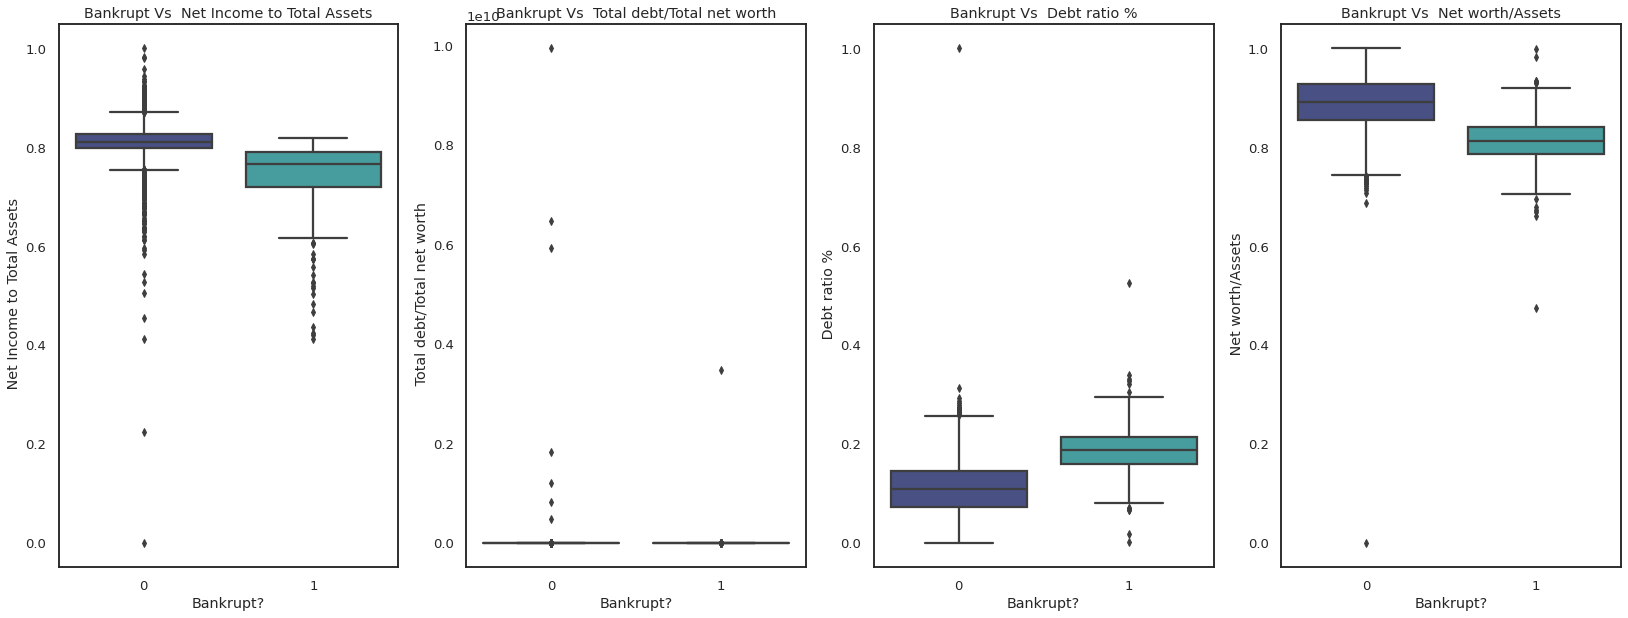

In [127]:
# Chart - 9 visualization code

n = 0 
parameter = [' Net Income to Total Assets',' Total debt/Total net worth',' Debt ratio %',' Net worth/Assets']
f, axes=plt.subplots(ncols=4, figsize=(28, 10))

for i in parameter:

  sns.boxplot(x='Bankrupt?', y=i, data=df_company_new, ax=axes[n],palette = 'mako')
  axes[n].set_title(f'Bankrupt Vs {i}')
  n = n + 1

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10  Plotting interesting features using Distplot (Univariate)

Text(0.5, 1.0, '  Net Income to Total Assets \n (Unstable companies)')

Text(0.5, 1.0, '  Total debt/Total net worth \n (Unstable companies)')

Text(0.5, 1.0, '  Debt ratio % \n (Unstable companies)')

Text(0.5, 1.0, '  Net worth/Assets \n (Unstable companies)')

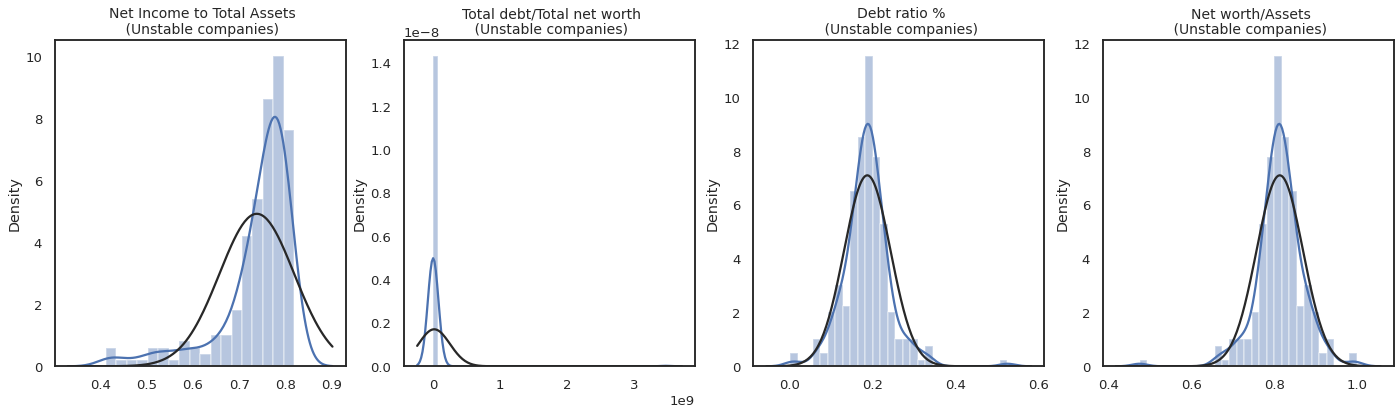

In [128]:
# Chart - 10 visualization code

para = [' Net Income to Total Assets',' Total debt/Total net worth',' Debt ratio %',' Net worth/Assets']
f, axes=plt.subplots(1,4, figsize=(24, 6))
n = 0
for i in para:

  df_temp = df_company_new[i].loc[df_company_new['Bankrupt?'] == 1].values
  sns.distplot( df_temp ,ax=axes[n], fit = scipy.stats.norm)
  axes[n].set_title(f' {i} \n (Unstable companies)', fontsize=14)
  n = n + 1

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11  Bargraph(Bivariate with Categorical - Numerical)

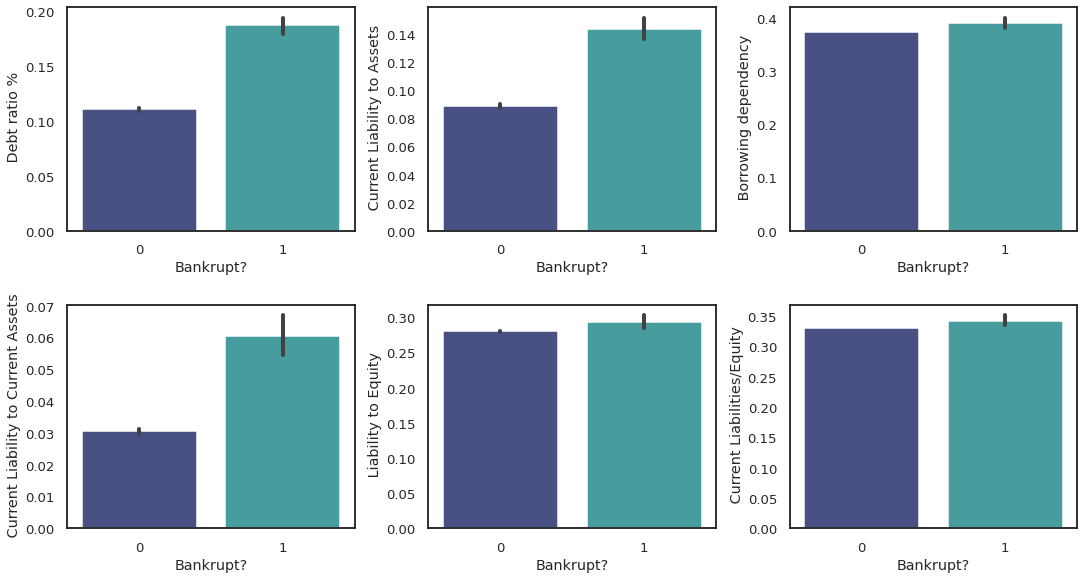

In [129]:
# Chart - 11 visualization code

#For the sake of simplicity, we analyze the six top positively and negatively correlated attributes.

positive_corr = df_company_new[numeric_features].corrwith(df_company_new["Bankrupt?"]).sort_values(ascending=False)[:6].index.tolist()
negative_corr = df_company_new[numeric_features].corrwith(df_company_new["Bankrupt?"]).sort_values()[:6].index.tolist()

positive_corr = df_company_new[positive_corr + ["Bankrupt?"]].copy()
negative_corr = df_company_new[negative_corr + ["Bankrupt?"]].copy()

def corrbargraph(x_value, y_value):
    
    plt.figure(figsize=(15,8))

    for i in range(1,7):
        plt.subplot(2,3,i)  
        sns.barplot(x = x_value, y = y_value[i-1],data = df_company_new,palette = 'mako')

    plt.tight_layout(pad=0.5)


x_value = positive_corr.columns.tolist()[-1]
y_value = positive_corr.columns.tolist()[:-1]

corrbargraph(x_value, y_value)

<Figure size 720x576 with 0 Axes>

Text(0.5, 1.0, 'Correlation Matrix')

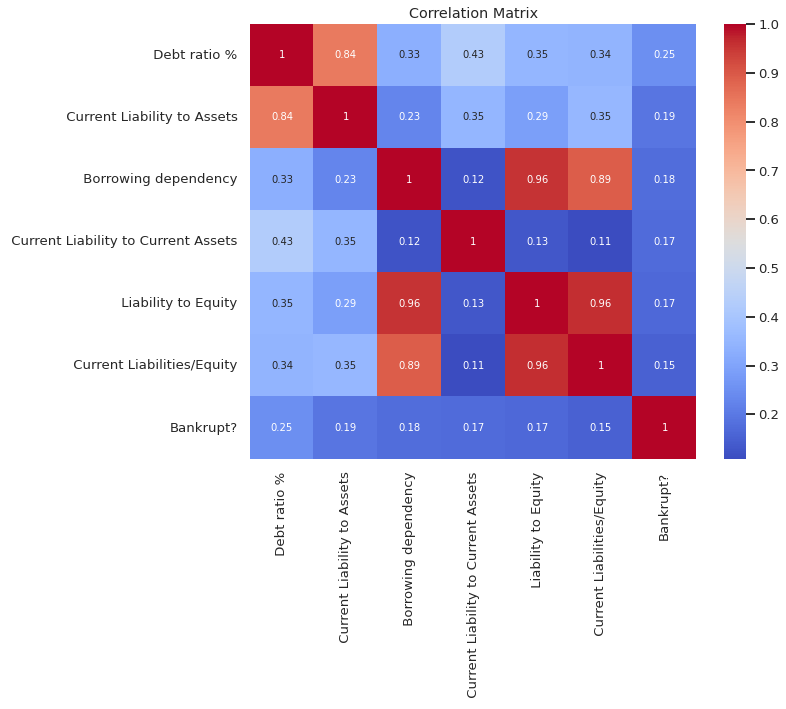

In [132]:
# Chart - 11 visualization code

#For the sake of simplicity, we analyze the six top positively and negatively correlated attributes.

positive_corr_cols = df_company_new[numeric_features].corrwith(df_company_new["Bankrupt?"]).sort_values(ascending=False)[:6].index.tolist()
negative_corr_cols = df_company_new[numeric_features].corrwith(df_company_new["Bankrupt?"]).sort_values()[:6].index.tolist()

positive_corr = df_company_new[positive_corr_cols + ["Bankrupt?"]].copy()
negative_corr = df_company_new[negative_corr_cols + ["Bankrupt?"]].copy()

corr = positive_corr.corr()

sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm',cbar=True)
plt.title('Correlation Matrix')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12  Bargraph(Bivariate)

In [ ]:
# Chart - 12 visualization code

x_value = negative_corr.columns.tolist()[-1]
y_value = negative_corr.columns.tolist()[:-1]

corrbargraph( x_value, y_value)
plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13  Scatterplot(Bivariate)

Text(0.5, 0.98, 'Correlation Between Positive Attributes')

Text(0.5, 1.0, 'Debt Ratio vs Current Liability to Assets')

Text(0.5, 0, 'Debt Ratio')

Text(0, 0.5, 'Current Liability to Assets Ratio')

Text(0.5, 1.0, 'Borrowing Dependency vs Liability to Equity')

Text(0.5, 0, 'Borrowing Dependency')

Text(0, 0.5, 'Liability to Equity Ratio')

Text(0.5, 0.98, 'Correlation Between Negative Attributes')

Text(0.5, 1.0, 'ROA (A) vs ROA (B)')

Text(0.5, 0, 'ROA (A)')

Text(0, 0.5, 'ROA (B)')

Text(0.5, 1.0, 'ROA (B) vs ROA (C)')

Text(0.5, 0, 'ROA (B)')

Text(0, 0.5, 'ROA (C)')

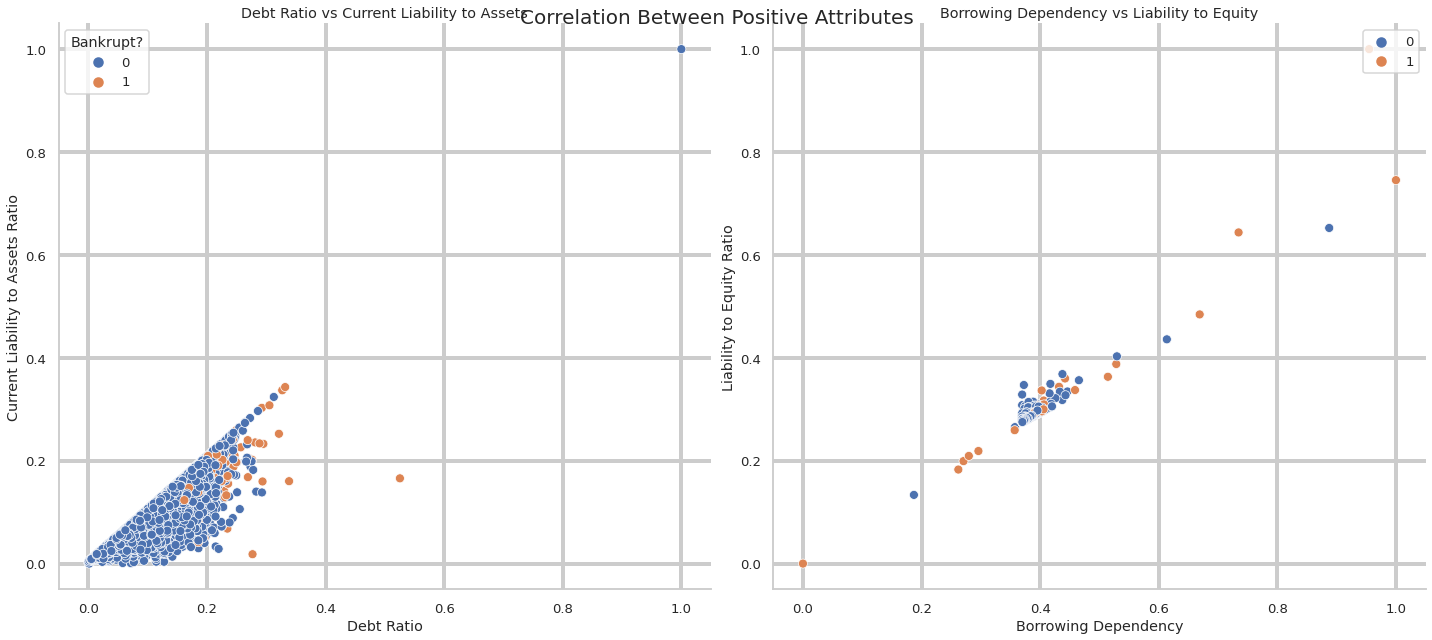

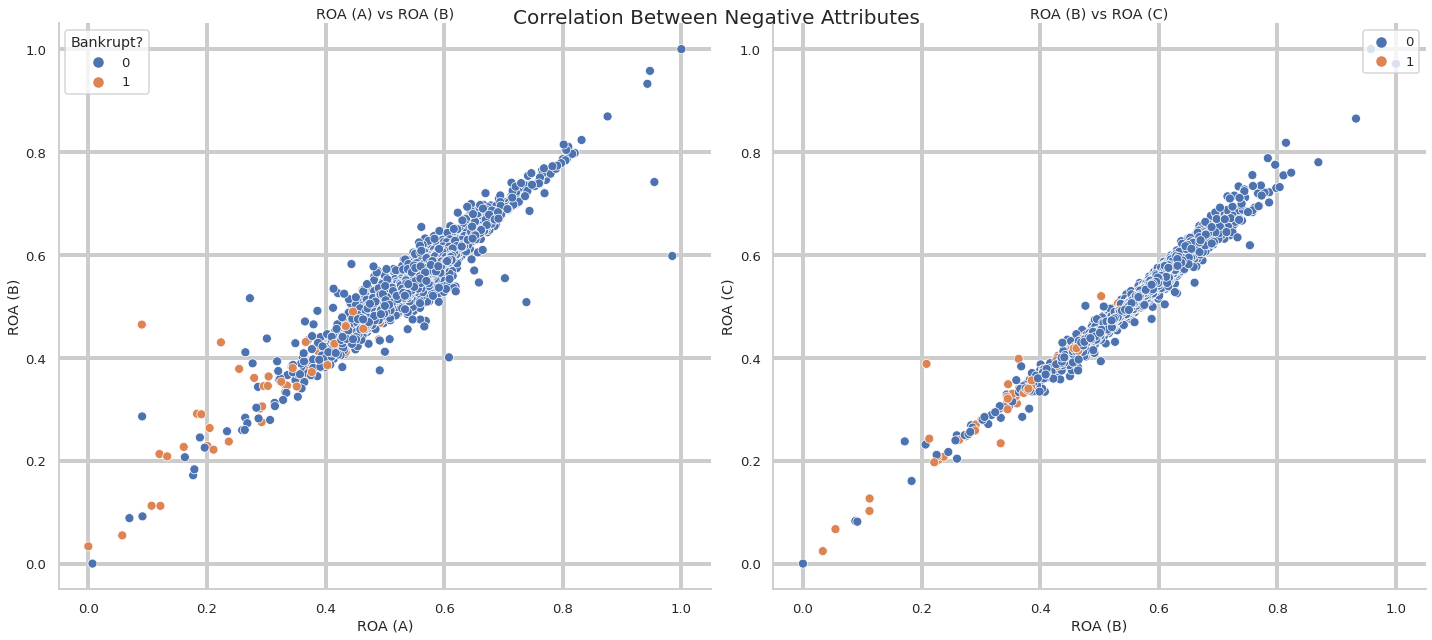

In [145]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(20, 9))
plt.suptitle("Correlation Between Positive Attributes", fontsize=20)
plt.subplots_adjust(hspace=0.4)

plt.subplot(1,2,1)
plt.title("Debt Ratio vs Current Liability to Assets")
sns.scatterplot(data=df_company_new, x=' Debt ratio %', y=' Current Liability to Assets',color = 'teal', hue = "Bankrupt?")
plt.xlabel("Debt Ratio")
plt.ylabel("Current Liability to Assets Ratio")

plt.subplot(1,2,2)
plt.title("Borrowing Dependency vs Liability to Equity")
sns.scatterplot(data=df_company_new, x=' Borrowing dependency', y=' Liability to Equity',color = 'teal', hue = "Bankrupt?")
plt.xlabel("Borrowing Dependency")
plt.ylabel("Liability to Equity Ratio")

sns.despine()
plt.legend(loc='upper right')
plt.tight_layout()


sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(20, 9))
plt.suptitle("Correlation Between Negative Attributes", fontsize=20)
plt.subplots_adjust(hspace=0.4)

plt.subplot(1,2,1)
plt.title("ROA (A) vs ROA (B)")
sns.scatterplot(data=df_company_new, x=' ROA(A) before interest and % after tax',y=' ROA(B) before interest and depreciation after tax',color = 'teal', hue = "Bankrupt?")
plt.xlabel("ROA (A)")
plt.ylabel("ROA (B)")

plt.subplot(1,2,2)
plt.title("ROA (B) vs ROA (C)")
sns.scatterplot(data=df_company_new, x=' ROA(B) before interest and depreciation after tax', y=' ROA(C) before interest and depreciation before interest',color = 'teal', hue = "Bankrupt?")
plt.xlabel("ROA (B)")
plt.ylabel("ROA (C)")

sns.despine()
plt.legend(loc='upper right')
plt.tight_layout()

In [146]:
def scatter_plot(data, x_col, y_col, title, x_label, y_label, hue_col, size=(20,9)):
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=size)
    plt.suptitle(title, fontsize=20)
    sns.scatterplot(data=data, x=x_col, y=y_col, color='teal', hue=hue_col)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    sns.despine()
    plt.legend(loc='upper right')
    plt.tight_layout()

Correlation Between Positive Attributes
Correlation Between Negative Attributes


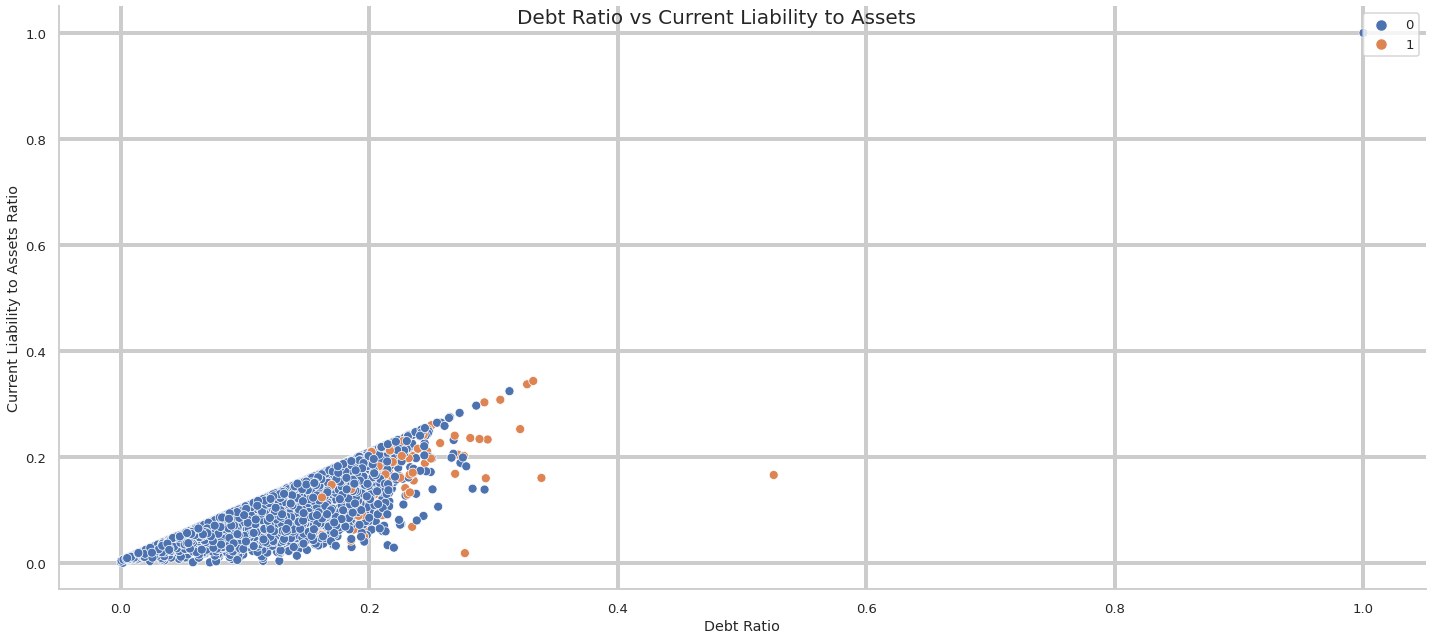

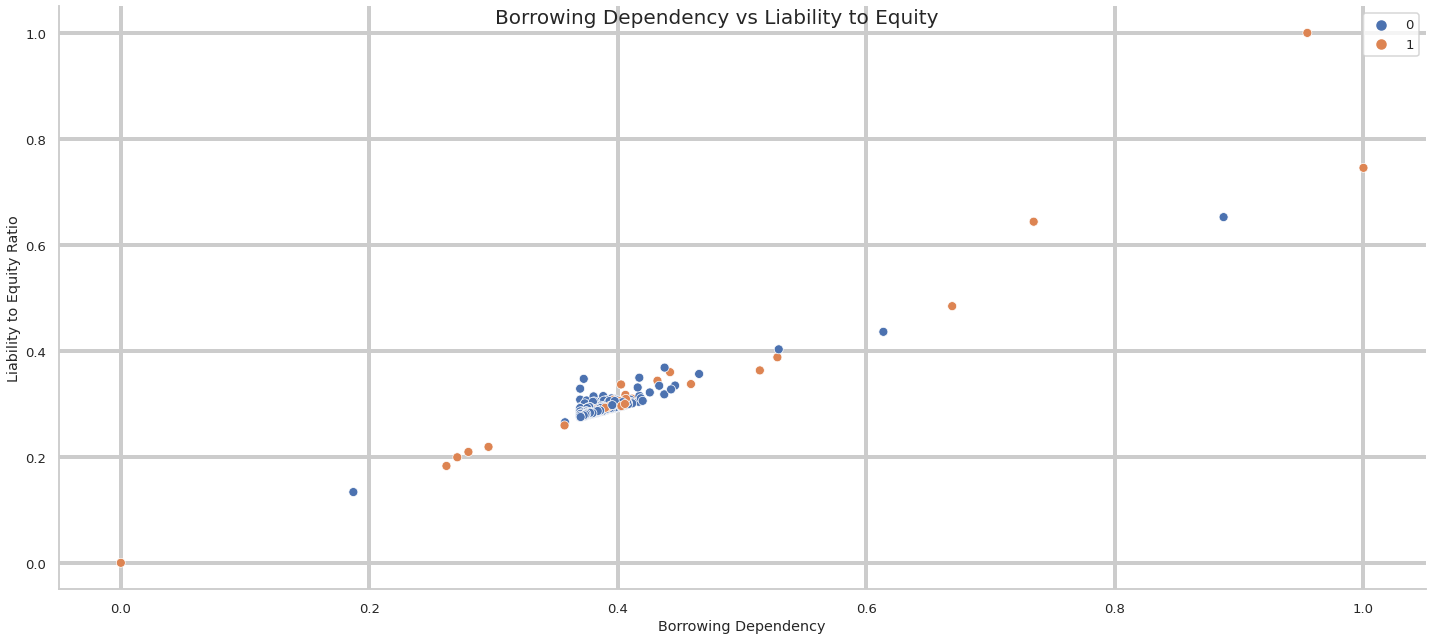

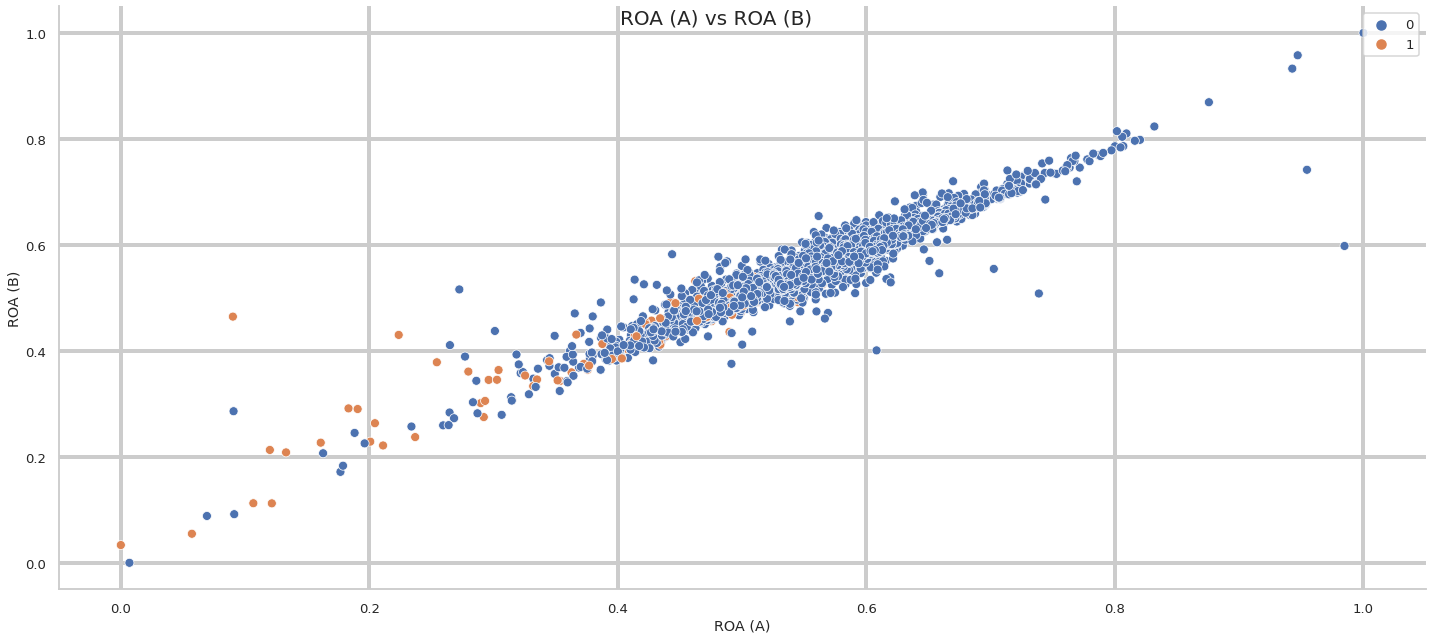

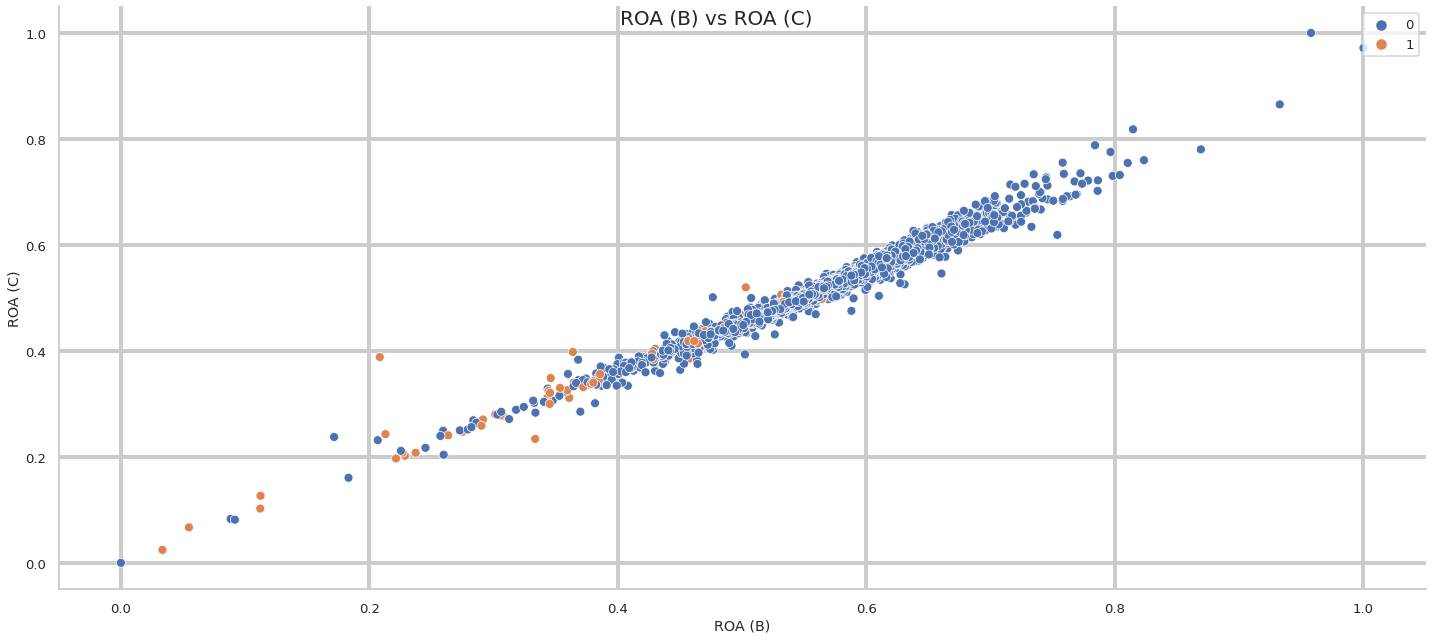

In [149]:
print("Correlation Between Positive Attributes")
scatter_plot(data=df_company_new, x_col=' Debt ratio %', y_col=' Current Liability to Assets',title="Debt Ratio vs Current Liability to Assets", x_label="Debt Ratio", y_label="Current Liability to Assets Ratio", hue_col="Bankrupt?")
scatter_plot(data=df_company_new, x_col=' Borrowing dependency', y_col=' Liability to Equity',title="Borrowing Dependency vs Liability to Equity", x_label="Borrowing Dependency", y_label="Liability to Equity Ratio", hue_col="Bankrupt?")
print("Correlation Between Negative Attributes")
scatter_plot(data=df_company_new, x_col=' ROA(A) before interest and % after tax', y_col=' ROA(B) before interest and depreciation after tax',title="ROA (A) vs ROA (B)", x_label="ROA (A)", y_label="ROA (B)", hue_col="Bankrupt?")
scatter_plot(data=df_company_new, x_col=' ROA(B) before interest and depreciation after tax', y_col=' ROA(C) before interest and depreciation before interest',title="ROA (B) vs ROA (C)", x_label="ROA (B)", y_label="ROA (C)", hue_col="Bankrupt?")


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [162]:
# Correlation Heatmap visualization code
def plot_corr(data, relation, cmap='RdBu', annot=True, annot_kws={'size':12}, cbar=True, square=True, linewidths=.5, center=0):
    plt.figure(figsize=(20,10))
    sns.heatmap(data[relation].corr(),annot=annot, annot_kws=annot_kws, cmap=cmap,cbar=cbar, square=square, linewidths=linewidths, center=center)
    plt.show()

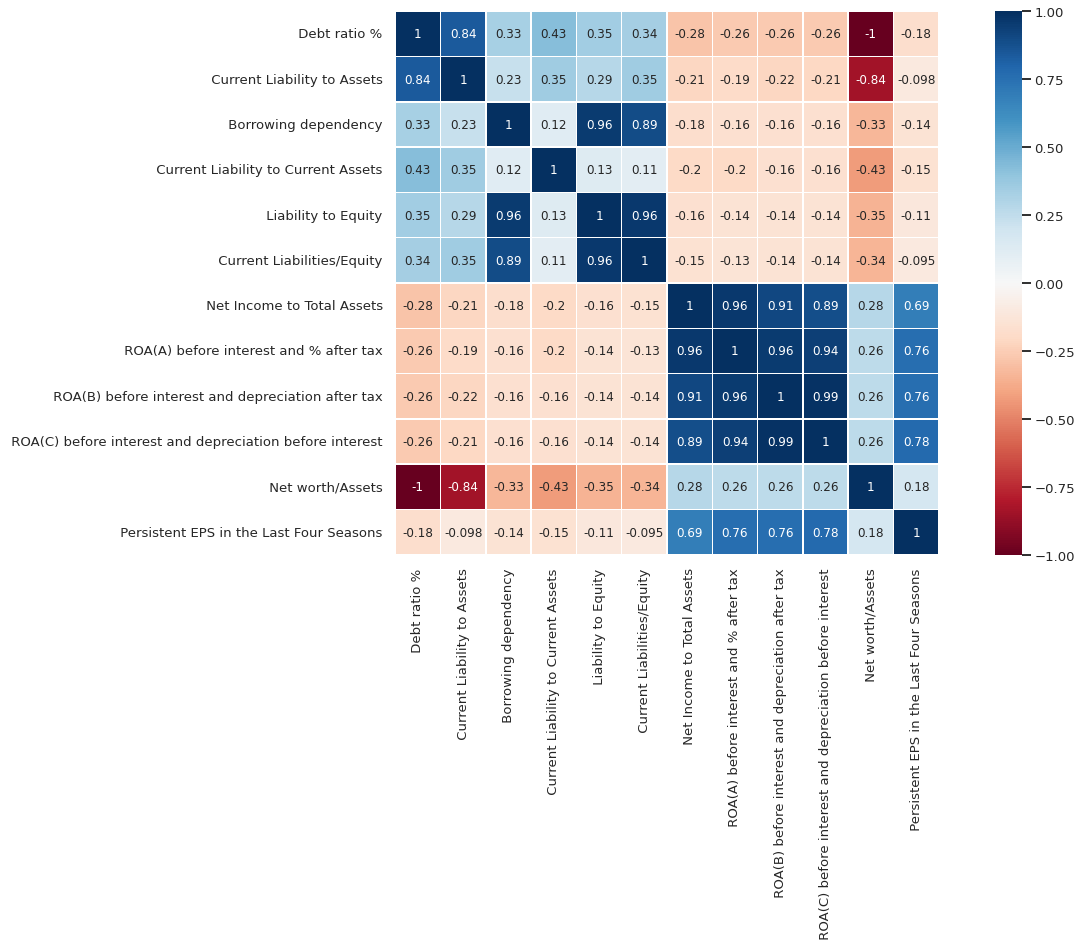

In [163]:
relation = positive_corr.columns.tolist()[:-1] + negative_corr.columns.tolist()[:-1]
plot_corr(df_company_new, relation)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

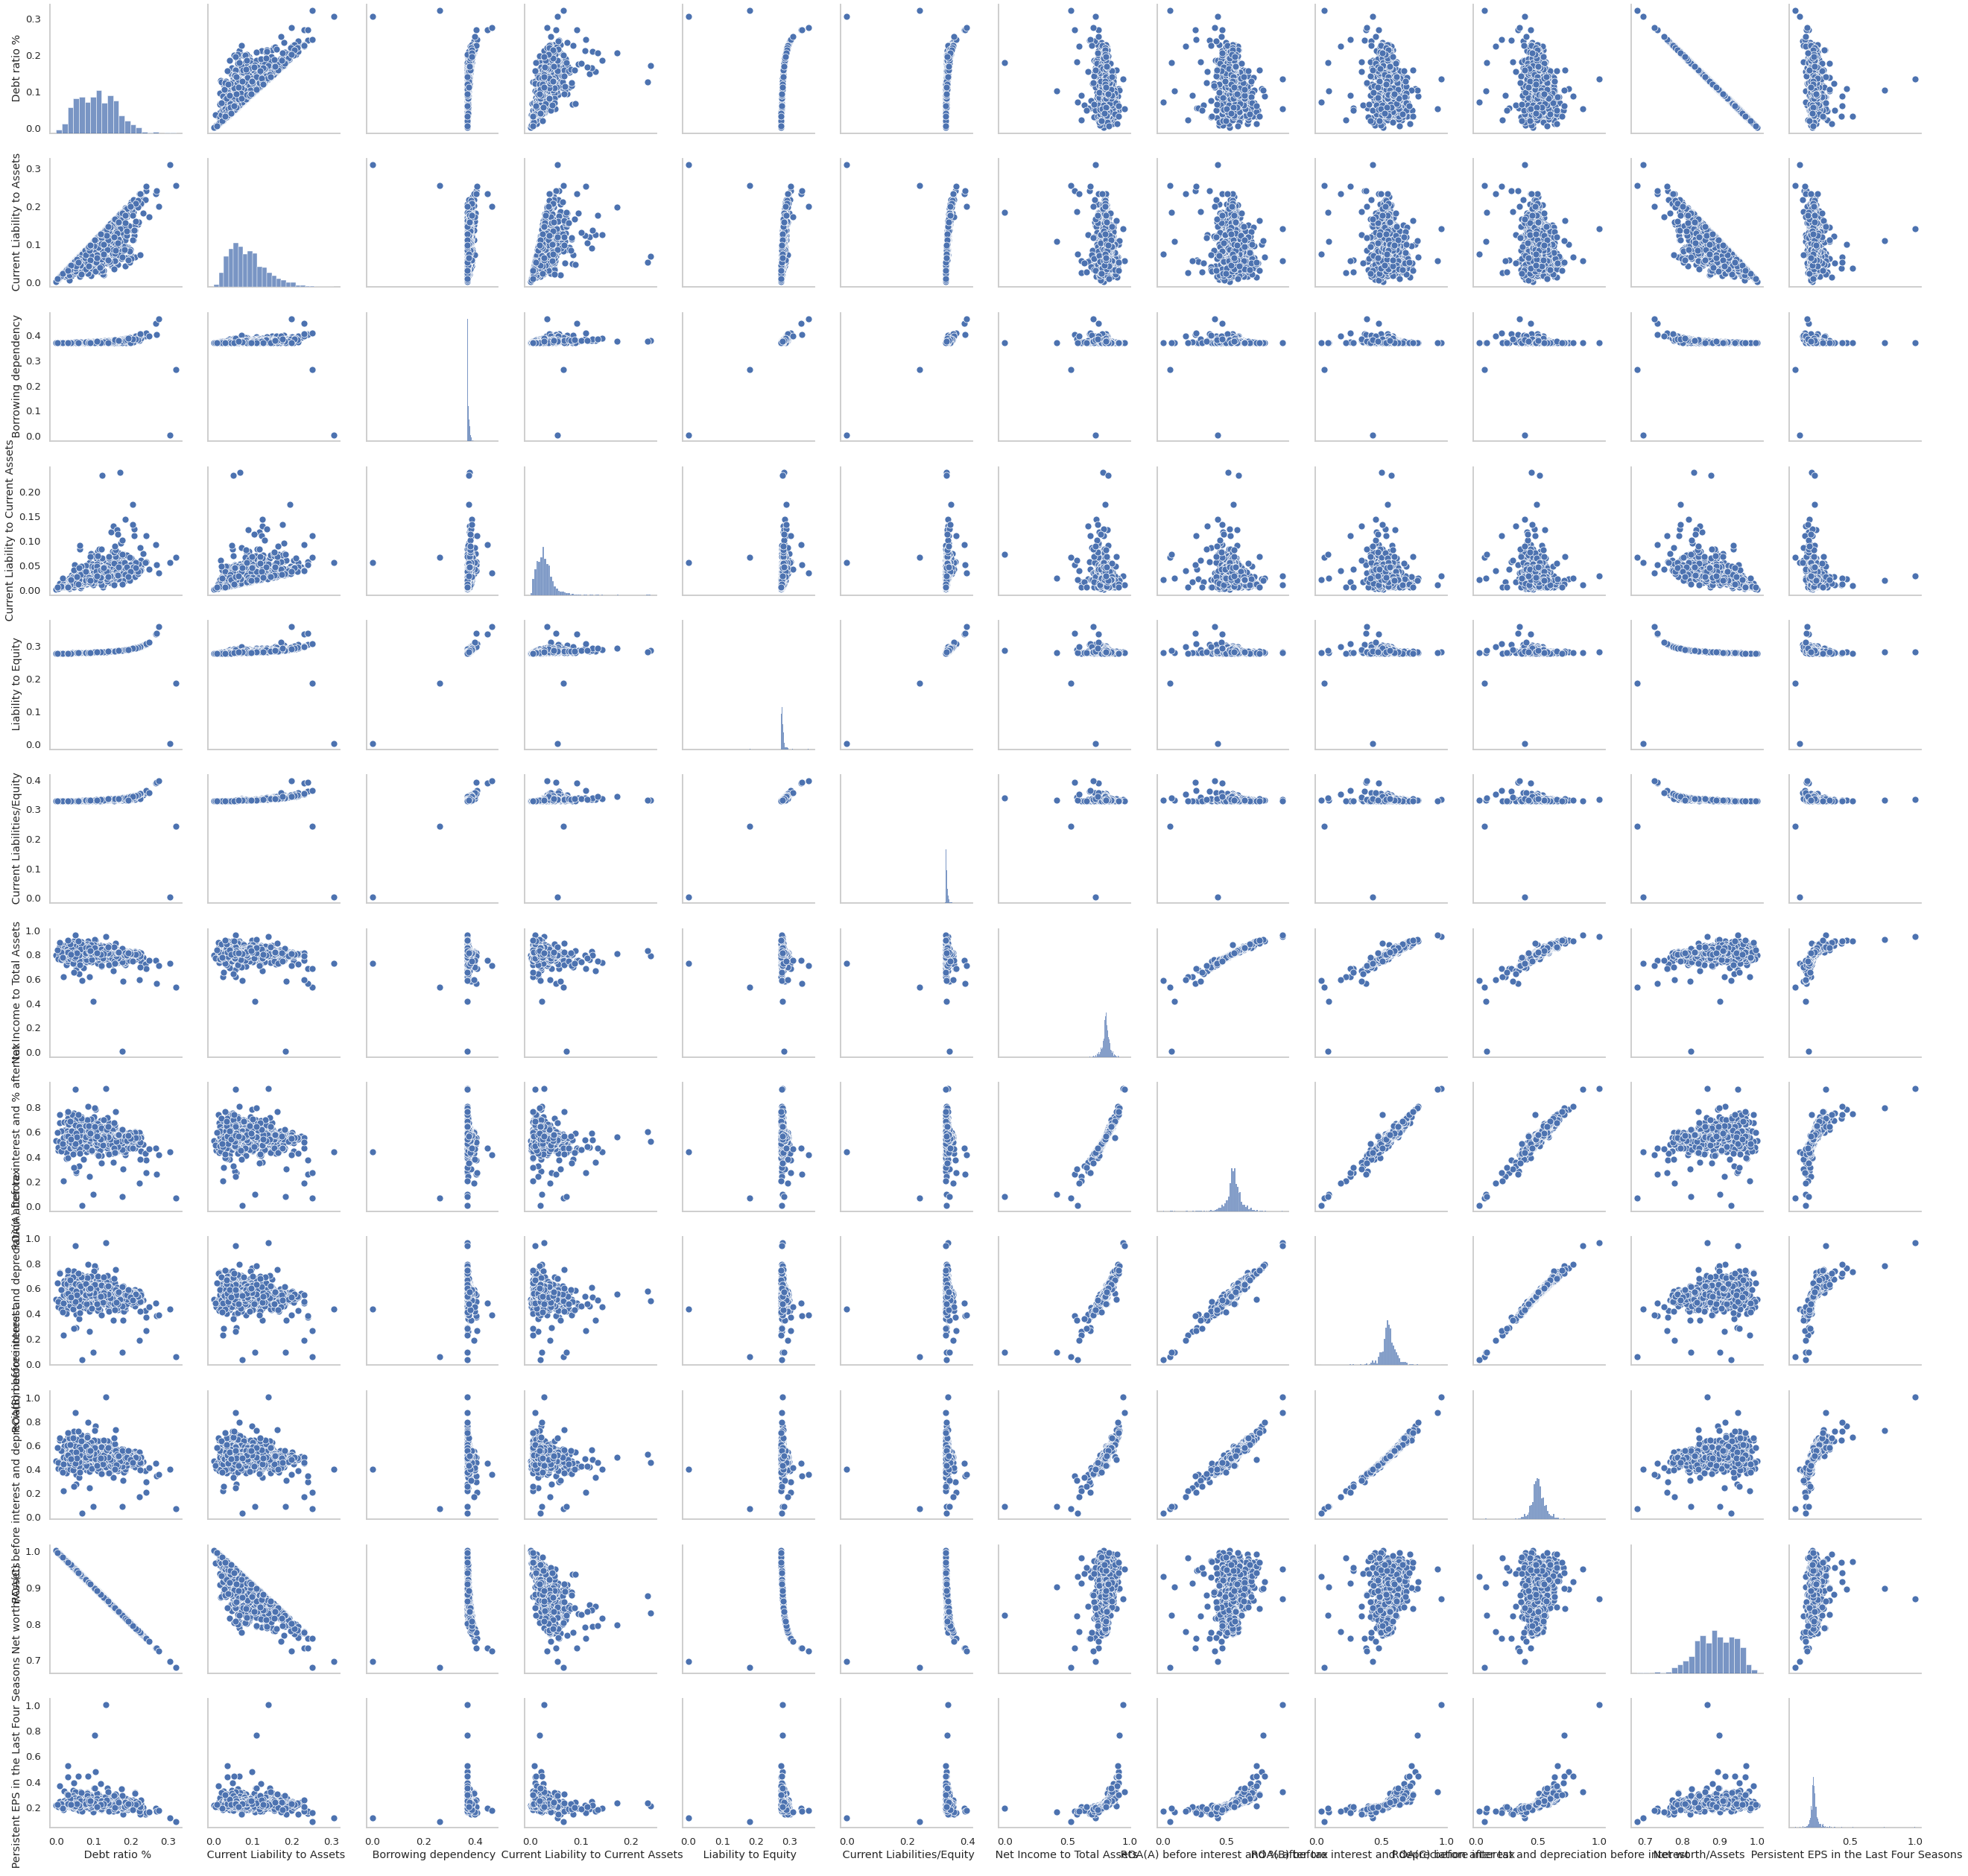

In [168]:
# Pair Plot visualization code

# #code block requires huge amount of time to execute therefore pasted the output of the block and commented the code.
#relation = positive_corr.columns.tolist()[:-1] + negative_corr.columns.tolist()[:-1]
sns.set_style("whitegrid", {'axes.grid' : False}) #set style of the plot

#plot the pair plot of all the required columns in the dataframe
pp=sns.pairplot(df_company_new[relation].sample(1000))
pp.fig.set_size_inches(45,45)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1.Companies that encounter financial difficulties tend to have lower ROA.

2.Net Value per Share does not affect the Target Variable.

3.The Per Share Net profit before tax (Yuan ¥) is lower for stable companies.

### Hypothetical Statement - 1  

Companies that encounter financial difficulties tend to have lower ROA

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: Companies that encounter financial difficulties tend to have lower ROA.

Alternate Hypothesis : Companies that encounter financial difficulties tend to have higher ROA.

Test Type: Two tailed test

#### 2. Perform an appropriate statistical test.

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, ' ROA(C) before interest and depreciation before interest / p-value of t-test = :2.4992941411069864e-31')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, ' ROA(A) before interest and % after tax / p-value of t-test = :2.0100138101945862e-29')

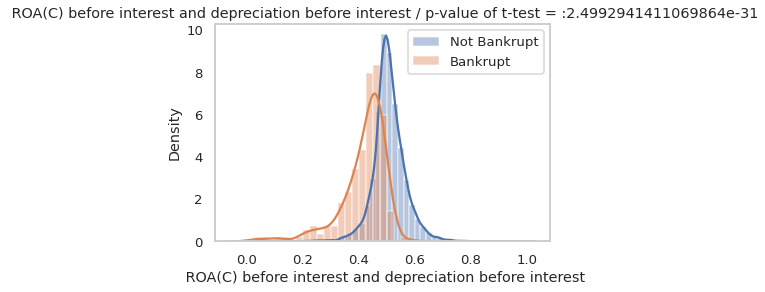

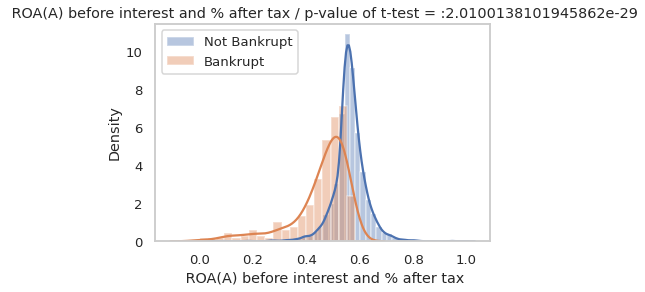

In [39]:
# Perform Statistical Test to obtain P-Value
from scipy import stats
# Seperate dfs
bankrupt_df = df_company_new[df_company_new['Bankrupt?']==True]
not_bankrupt_df = df_company_new[df_company_new['Bankrupt?']==False]

# Analyze distributions of selected features using rfecv
cols = df_company_new.drop("Bankrupt?", axis=1).columns
cols = df_company_new.iloc[:,1:3]

for feature in cols:
  
  a = bankrupt_df[feature]
  b = not_bankrupt_df[feature]
  b = b.sample(n=len(a), random_state=42) # Take random sample to match length of target
  # Running t-tests
  test = stats.ttest_ind(a,b)   
  plt.figure() 
  sns.distplot(not_bankrupt_df[feature], kde=True, label="Not Bankrupt") 
  sns.distplot(bankrupt_df[feature], kde=True, label="Bankrupt")
  plt.title("{} / p-value of t-test = :{}".format(feature, test[1]))
  plt.legend()

##### Which statistical test have you done to obtain P-Value?

I have used T-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis can't be rejected and Companies that encounter financial difficulties tend to have lower ROA.

##### Why did you choose the specific statistical test?

For studies with a large sample size, t-tests and their corresponding confidence intervals can and should be used even for heavily skewed data.

So, for skewed data we can use T-test for better result. Thus, I used t - test.

### Hypothetical Statement - 2
Net Value per Share does not affect the Target Variable.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: Net Value per Share does not affect the Target Variable.

Alternate Hypothesis : Net Value per Share affect the Target Variable.

Test Type: Two tailed test

#### 2. Perform an appropriate statistical test.

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, ' Net Value Per Share (B) / p-value of t-test = :2.3803484215942004e-29')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, ' Net Value Per Share (A) / p-value of t-test = :2.086990758841978e-29')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, ' Net Value Per Share (C) / p-value of t-test = :3.873562473279922e-29')

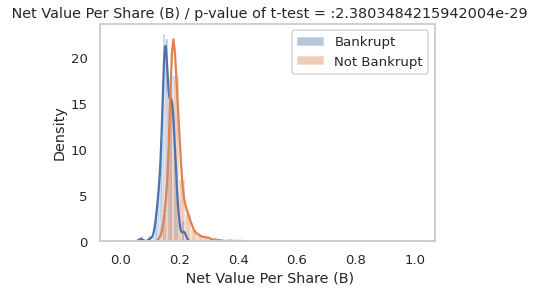

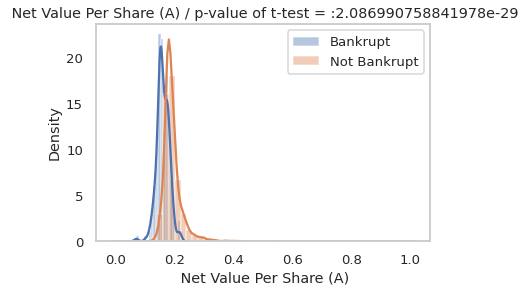

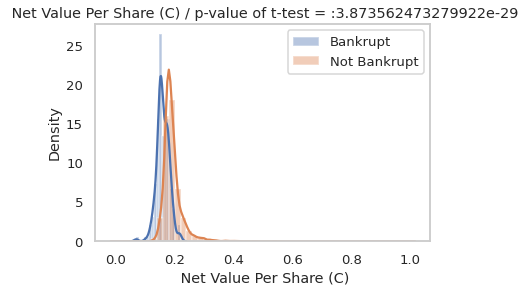

In [40]:
# Perform Statistical Test to obtain P-Value

cols = df_company_new.iloc[:,16:19]
for feature in cols:
  
  a = bankrupt_df[feature]
  b = not_bankrupt_df[feature]
  b = b.sample(n=len(a), random_state=42) # Take random sample from each feature to match length of target
  # Running t-tests
  test = stats.ttest_ind(a,b)   
  plt.figure() 
  sns.distplot(bankrupt_df[feature], kde=True, label="Bankrupt")
  sns.distplot(not_bankrupt_df[feature], kde=True, label="Not Bankrupt") 
  plt.title("{} / p-value of t-test = :{}".format(feature, test[1]))
  plt.legend()


##### Which statistical test have you done to obtain P-Value?

I have used T-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis isn't True and Net Value per Share does affect the Target Variable. Therfore, we accept the Alternate Hypothesis here.

##### Why did you choose the specific statistical test?

We have skewed and highly imbalanced data. Therfore we use t-test for our hypothesis and find our p value.

### Hypothetical Statement - 3
The Per Share Net profit before tax (Yuan ¥) is lower for stable companies.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: The Per Share Net profit before tax (Yuan ¥) is lower for stable companies.

Alternate Hypothesis : The Per Share Net profit before tax (Yuan ¥) is lower for unstable companies.

Test Type: Two tailed test

#### 2. Perform an appropriate statistical test.

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, ' Per Share Net profit before tax (Yuan ¥) / p-value of t-test = :9.919738619127904e-35')

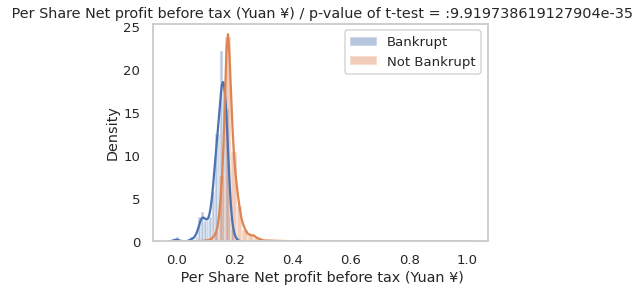

In [41]:
# Perform Statistical Test to obtain P-Value

cols = df_company_new.iloc[:,23:24]
for feature in cols:
  
  a = bankrupt_df[feature]
  b = not_bankrupt_df[feature]
  b = b.sample(n=len(a), random_state=42) # Take random sample from each feature to match length of target
  # Running t-tests
  test = stats.ttest_ind(a,b)   
  plt.figure() 
  sns.distplot(bankrupt_df[feature], kde=True, label="Bankrupt")
  sns.distplot(not_bankrupt_df[feature], kde=True, label="Not Bankrupt") 
  plt.title("{} / p-value of t-test = :{}".format(feature, test[1]))
  plt.legend()

##### Which statistical test have you done to obtain P-Value?

I have used T-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis isn't True and The Per Share Net profit before tax (Yuan ¥) is lower for unstable companies. Therfore, we accept the Alternate Hypothesis here and will reject the null hypothesis.



##### Why did you choose the specific statistical test?

We have skewed and highly imbalanced data. Therfore we use t-test for our hypothesis and find our p value.

## ***6. Feature Engineering & Data Pre-processing***

In [42]:
#Creating a copy of main data frames for further analysis
df_company_2 = df_company.copy()

### 1. Handling Missing Values

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
 Operating Profit Rate                                      0
 Pre-tax net Interest Rate                                  0
 After-tax net Interest Rate                                0
 Non-industry income and expenditure/revenue                0
 Continuous interest rate (after tax)                       0
 Operating Expense Rate                                     0
 Research and development expense rate                      0
 Cash flow rate                                             0
 Interest-bearing debt interest rate                        0
 Tax rate (A)                                               0
 Net Val

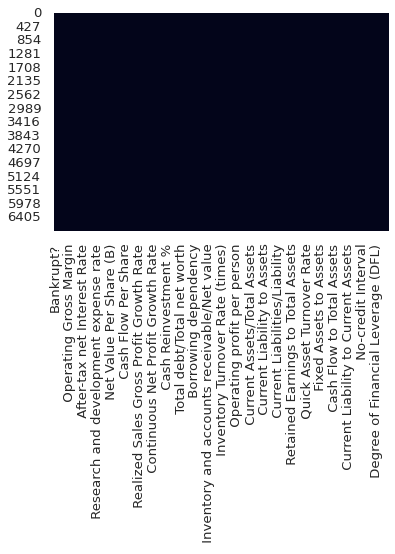

In [43]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df_company_2.isnull().sum())


# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df_company_2.isnull(), cbar=False)

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values to handle in the given dataset.

### 2. Handling Outliers

<Figure size 2160x5184 with 0 Axes>

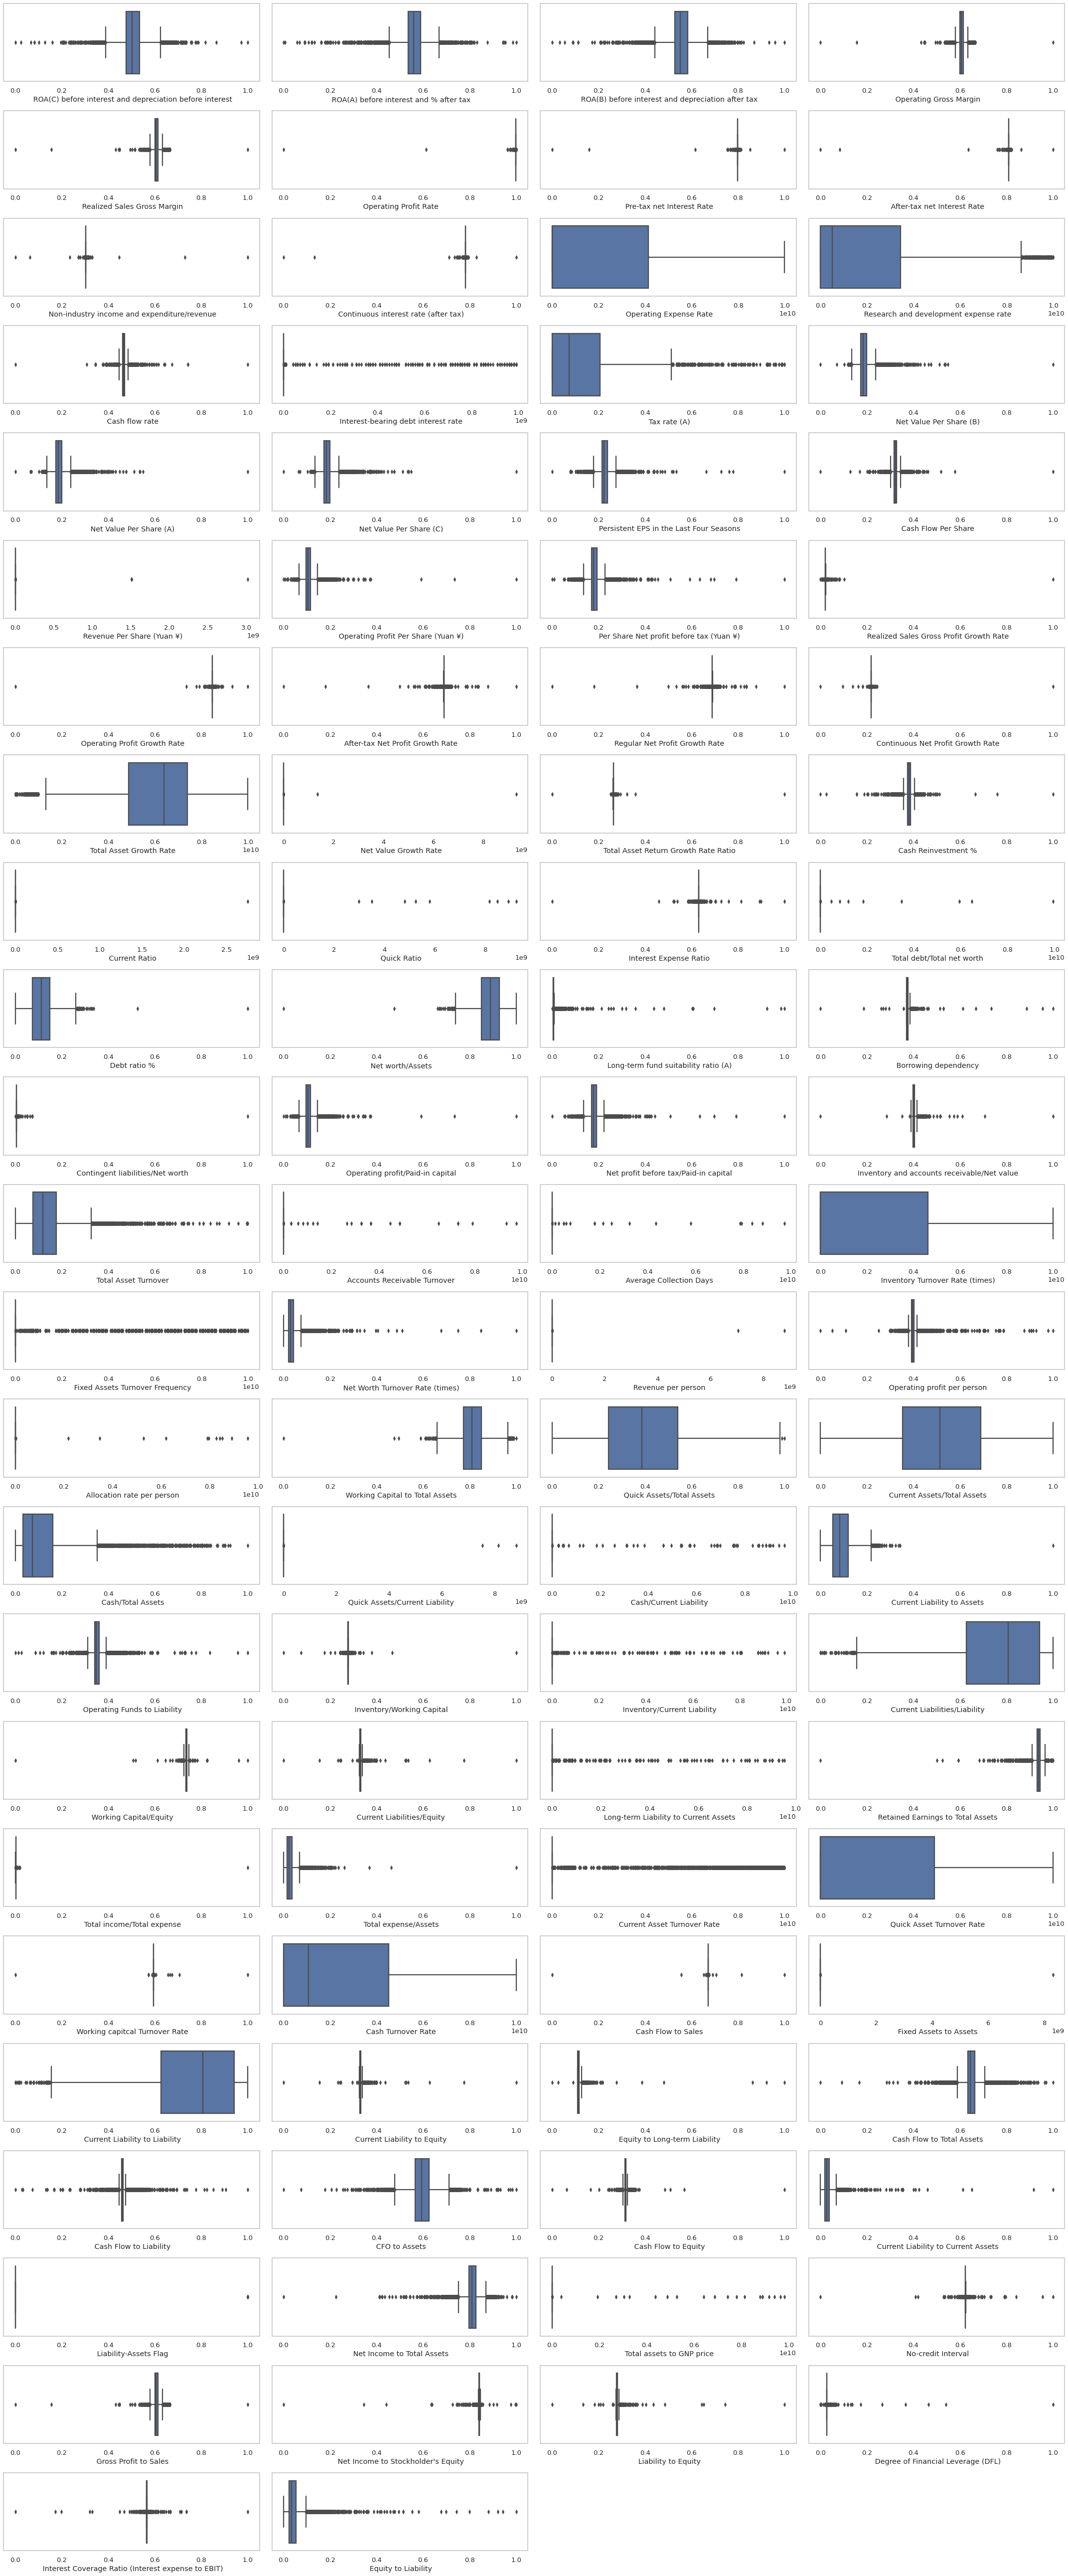

In [44]:
# Handling Outliers & Outlier treatments

flag_col = ['Bankrupt?', ' Net Income Flag']
other_col = [x for x in df_company_2.columns.to_list() if x not in ['Bankrupt?', ' Net Income Flag']]

# Plotting the boxplot for each independent variable
col = 4                           # Number of Columns 
row = int(len(other_col)/col+1)    # Row to autofit the number and size of plots
plt.figure(figsize=(30,row*3)) 
for n,column in enumerate(other_col):
    plot = plt.subplot(row,col,n+1)
    sns.boxplot(x= df_company_2[column], data = df_company_2, orient="h").margins(y=0.15)
    plt.tight_layout()

<Figure size 1800x360 with 0 Axes>

Text(0.5, 0, 'Feature name')

Text(0, 0.5, 'Number of outliers')

Text(0.5, 1.0, 'Total Outliers in each column using IQR')

[Text(0, 0, ' Degree of Financial Leverage (DFL)'),
 Text(0, 0, ' Interest Coverage Ratio (Interest expense to EBIT)'),
 Text(0, 0, ' Fixed Assets Turnover Frequency'),
 Text(0, 0, ' Current Asset Turnover Rate'),
 Text(0, 0, ' Total Asset Growth Rate'),
 Text(0, 0, ' Interest Expense Ratio'),
 Text(0, 0, ' Cash Flow to Liability'),
 Text(0, 0, ' No-credit Interval'),
 Text(0, 0, ' Non-industry income and expenditure/revenue'),
 Text(0, 0, ' Cash Flow to Sales'),
 Text(0, 0, ' Continuous Net Profit Growth Rate'),
 Text(0, 0, ' After-tax Net Profit Growth Rate'),
 Text(0, 0, ' Regular Net Profit Growth Rate'),
 Text(0, 0, ' Operating Profit Growth Rate'),
 Text(0, 0, ' Inventory/Working Capital'),
 Text(0, 0, ' Contingent liabilities/Net worth'),
 Text(0, 0, ' Cash Flow to Total Assets'),
 Text(0, 0, ' Operating profit per person'),
 Text(0, 0, ' After-tax net Interest Rate'),
 Text(0, 0, ' Cash Flow to Equity'),
 Text(0, 0, ' Realized Sales Gross Profit Growth Rate'),
 Text(0, 0, ' Lon

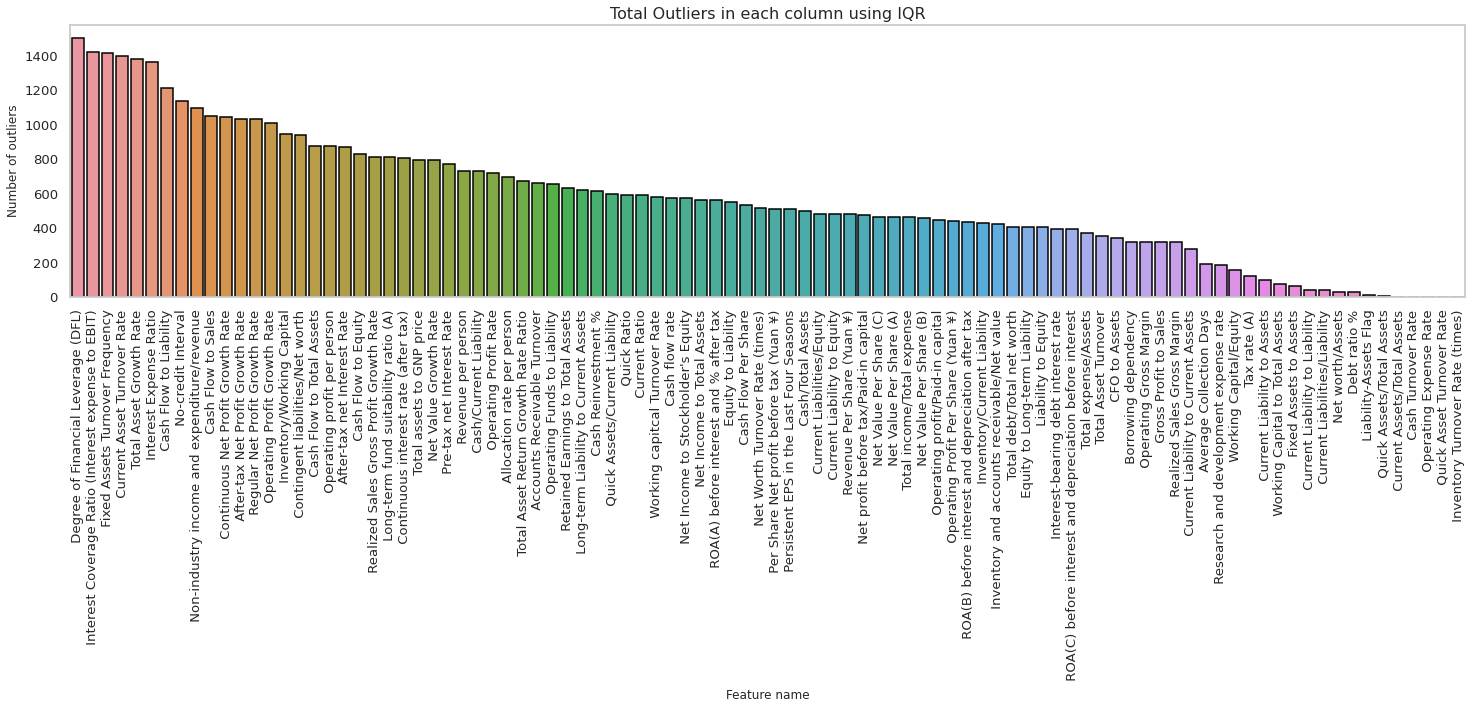

In [45]:
#Finding the 25th percentile and 75th percentiles.
Q1 = df_company_2[other_col].quantile(0.25)             
Q3 = df_company_2[other_col].quantile(0.75)

#Inter Quantile Range (75th perentile - 25th percentile)
IQR = Q3 - Q1                

#Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower_limit=Q1-1.5*IQR                        
upper_limit=Q3+1.5*IQR

# lower_limit = df[Con_col].mean() - 3*df[Con_col].std()
# upper_limit = df[Con_col].mean() + 3*df[Con_col].std()

# lower_limit = df[Con_col].quantile(0.003)
# upper_limit = df[Con_col].quantile(0.997)

outliers_df = ((df_company_2[other_col]<lower_limit) | (df_company_2[other_col]>upper_limit)).sum().to_frame().sort_values( by=[0], ascending = False ).reset_index()

plt.figure(figsize=(25,5))

plot = sns.barplot(x = 'index', y = 0,  data = outliers_df,  edgecolor='black')


plt.xlabel('Feature name', fontsize=12)
plt.ylabel('Number of outliers', fontsize=12)
plt.title('Total Outliers in each column using IQR', fontsize=16)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='center')


plt.show()

In [46]:
# Apply Capping(Winsorization) 
def outlier_handle(df, col_list):
    df_new = df.copy()
    for col_name in col_list:
        fence_low = df[col_name].quantile(0.005) 
        fence_high = df[col_name].quantile(0.995)

        # Capping Outliers using IQR method
        df_new.loc[:,  col_name] = np.where(df[col_name] >= fence_high, fence_high,
                                              np.where(df[col_name] <= fence_low,fence_low,
                                                       df[col_name]))
    return df_new
# Lets get the amount of outliers in each numerical columns
df_outliers = outlier_handle(df_company_2,other_col)

<Figure size 2160x5184 with 0 Axes>

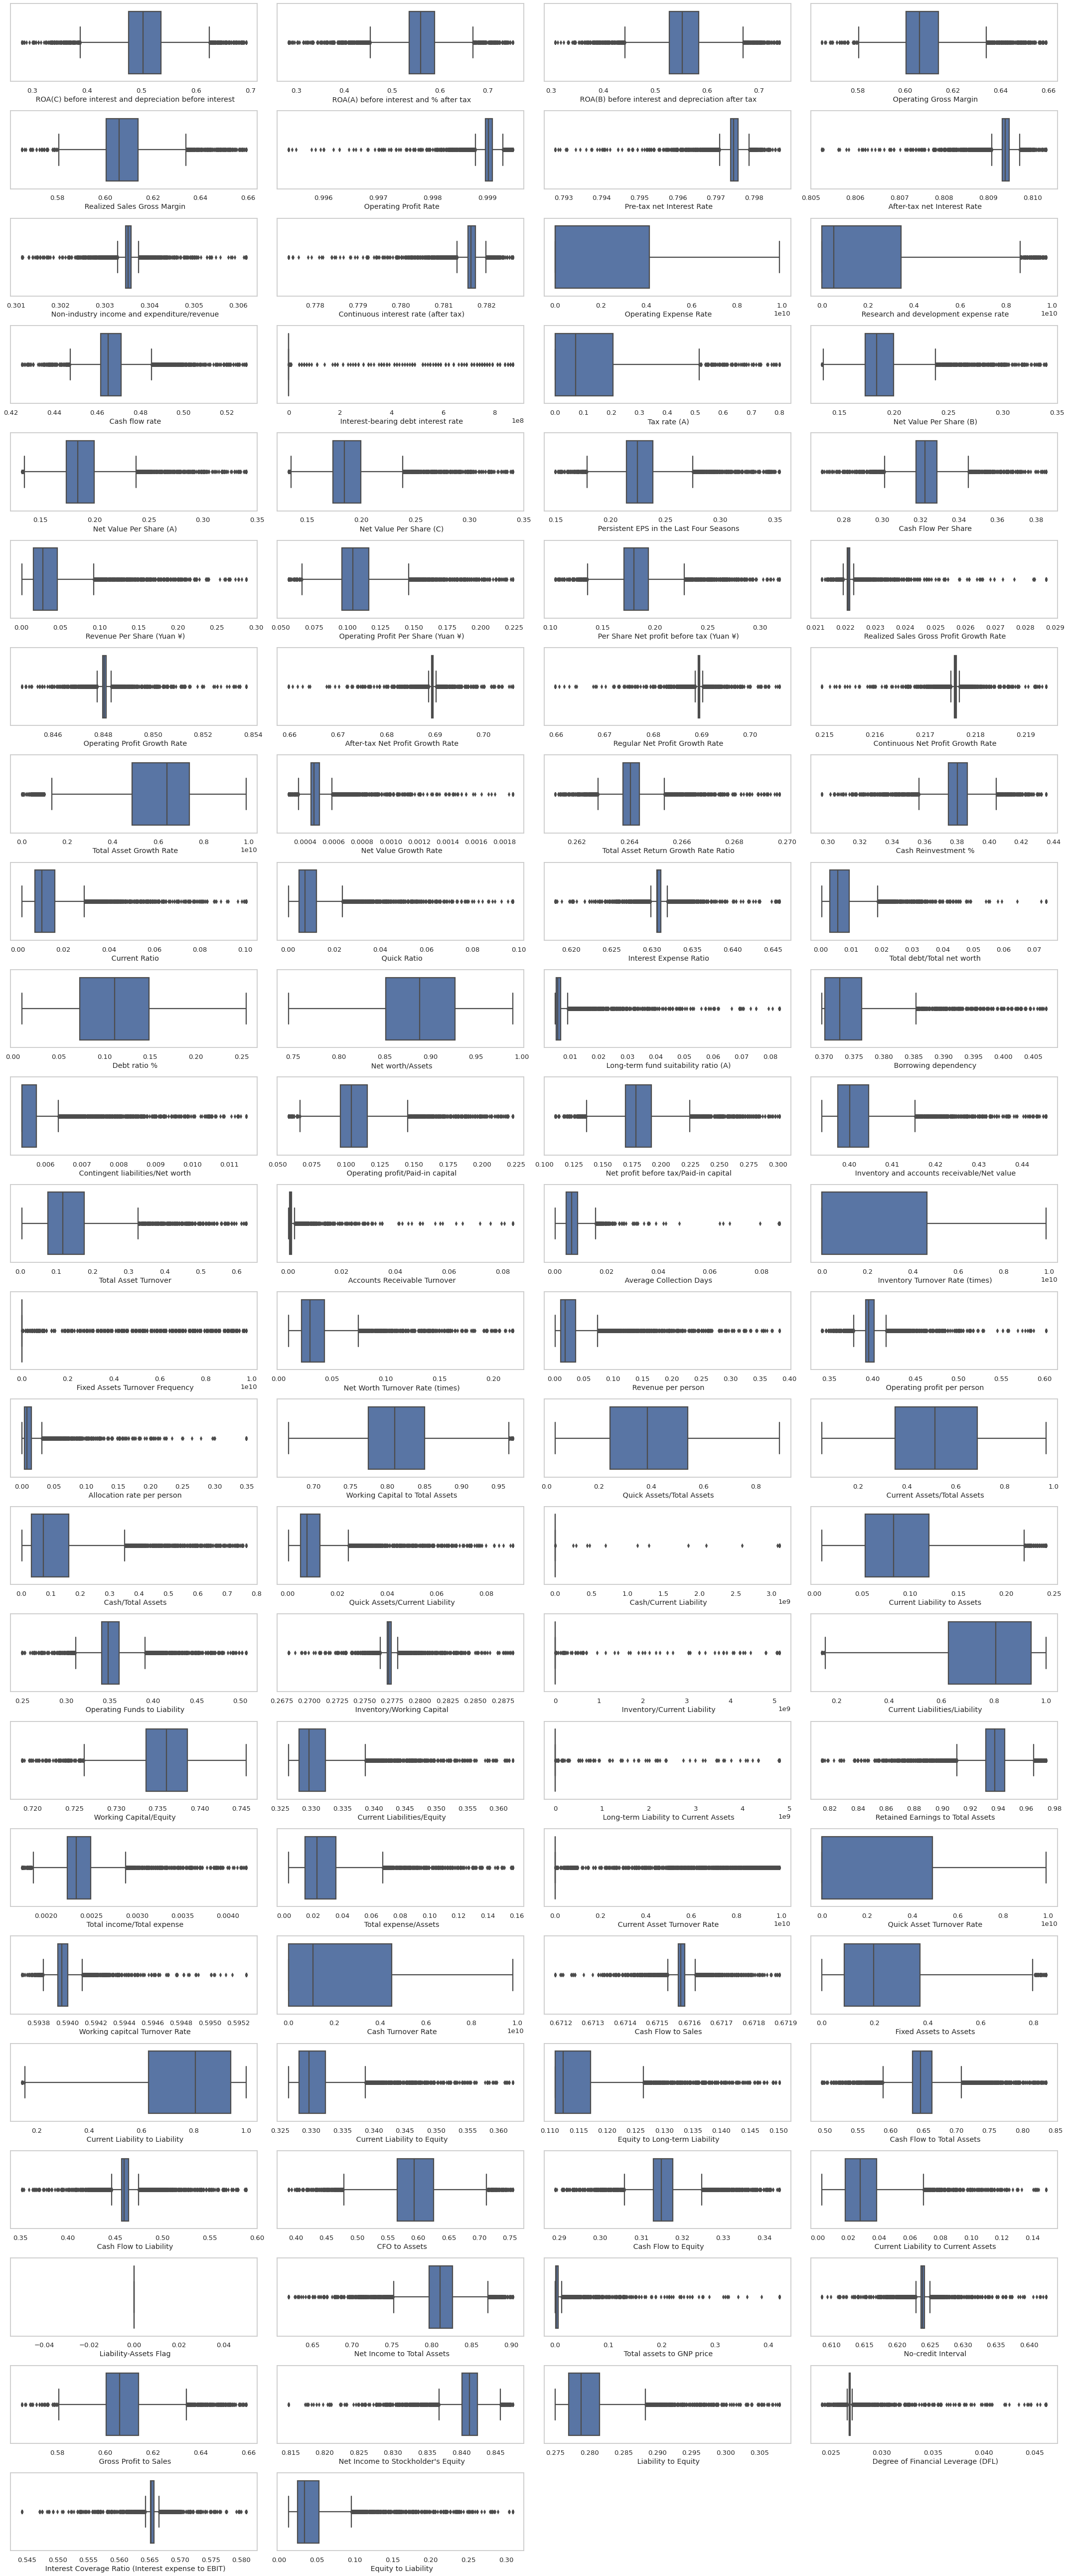

In [47]:
# Plotting the boxplot for each independent variable
col = 4                           # Number of Columns 
row = int(len(other_col)/col+1)    # Row to autofit the number and size of plots
plt.figure(figsize=(30,row*3)) 
for n,column in enumerate(other_col):
    plot = plt.subplot(row,col,n+1)
    sns.boxplot(x= df_outliers[column], data = df_outliers, orient="h").margins(y=0.15)
    plt.tight_layout()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [48]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [49]:
# Expand Contraction

#### 2. Lower Casing

In [50]:
# Lower Casing

#### 3. Removing Punctuations

In [51]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [52]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [53]:
# Remove Stopwords

In [54]:
# Remove White spaces

#### 6. Rephrase Text

In [55]:
# Rephrase Text

#### 7. Tokenization

In [56]:
# Tokenization

#### 8. Text Normalization

In [57]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [58]:
# POS Taging

#### 10. Text Vectorization

In [59]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

We have a problem regarding the large number of features to choose from. RFE is effective at selecting those features (columns) in a training dataset that are more or most relevant in predicting the target variable. Model based feature selection uses a supervised machine learning model to judge the importance of each feature, and keeps only the most important ones. For this case, we are going to use a random forest classifier, since it usually yields good results and because this is a classification task.

In [60]:
# Manipulate Features to minimize feature correlation and create new features

# training set
X = df_company_2.iloc[:,1:].values
y = df_company_2.iloc[:,0].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [61]:
# determining optimal number of features
n_features = [5, 10, 15, 20, 25, 30, 35, 40]
for i in n_features:
    # Building the model based feature selection
    select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=i)

    select.fit(X_train, y_train)

    mask = select.get_support()

    X_train_rfe = select.transform(X_train)
    X_test_rfe = select.transform(X_test)

    score = RandomForestClassifier().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
    
    print("Test score: {:.3f}".format(score), " number of features: {}".format(i))

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=5)

Test score: 0.968  number of features: 5


RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10)

Test score: 0.967  number of features: 10


RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=15)

Test score: 0.971  number of features: 15


RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=20)

Test score: 0.971  number of features: 20


RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=25)

Test score: 0.971  number of features: 25


RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=30)

Test score: 0.972  number of features: 30


RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=35)

Test score: 0.971  number of features: 35


RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=40)

Test score: 0.975  number of features: 40


#### 2. Feature Selection

In [62]:
# Select your features wisely to avoid overfitting

select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=15)

select.fit(X_train, y_train)

mask = select.get_support()

X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = RandomForestClassifier().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)

print("Test score: {:.3f}".format(score), " number of features: {}".format(15))

features = pd.DataFrame({'features':list(df_company_2.iloc[:,1:].keys()), 'select':list(mask)})
features = list(features[features['select']==True]['features'])
features.append('Bankrupt?')


RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=15)

Test score: 0.972  number of features: 15


In [63]:
data_df = df_company_2[features]


data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0    Non-industry income and expenditure/revenue  6819 non-null   float64
 1    Interest-bearing debt interest rate          6819 non-null   float64
 2    Net Value Per Share (A)                      6819 non-null   float64
 3    Persistent EPS in the Last Four Seasons      6819 non-null   float64
 4    Net Value Growth Rate                        6819 non-null   float64
 5    Interest Expense Ratio                       6819 non-null   float64
 6    Total debt/Total net worth                   6819 non-null   float64
 7    Borrowing dependency                         6819 non-null   float64
 8    Net profit before tax/Paid-in capital        6819 non-null   float64
 9    Fixed Assets Turnover Frequency              6819 non-null   f

In [64]:
# Embedded Method of validating the feature importances of selected features
def randomforest_embedded(x,y):
  # Create the random forest eith hyperparameters
  model= RandomForestClassifier(n_estimators=550)
  # Fit the mmodel
  model.fit(x,y)
  # get the importance of thr resulting features
  importances= model.feature_importances_
  # Create a data frame for visualization
  final_df= pd.DataFrame({"Features": pd.DataFrame(x).columns, "Importances": importances})
  final_df.set_index('Importances')
  # Sort in ascending order to better visualization
  final_df= final_df.sort_values('Importances')
  # Plot the feature importances in bars
  # final_df.plot.bar(color='teal')
  return final_df

In [65]:
# Getting feature importance of selected features
randomforest_embedded(x=data_df.drop(["Bankrupt?"],axis=1),y=data_df["Bankrupt?"])

Features  Importances
9                Fixed Assets Turnover Frequency     0.053812
11                    Net Income to Total Assets     0.058570
6                     Total debt/Total net worth     0.058839
1            Interest-bearing debt interest rate     0.060204
2                        Net Value Per Share (A)     0.060491
0    Non-industry income and expenditure/revenue     0.061284
14                           Equity to Liability     0.062053
13            Degree of Financial Leverage (DFL)     0.063386
5                         Interest Expense Ratio     0.064279
10                             Cash/Total Assets     0.066249
7                           Borrowing dependency     0.073442
8          Net profit before tax/Paid-in capital     0.074835
3        Persistent EPS in the Last Four Seasons     0.077080
4                          Net Value Growth Rate     0.082414
12            Net Income to Stockholder's Equity     0.083059

In [66]:
#assign target variable and features
y = data_df['Bankrupt?']
x = data_df.drop('Bankrupt?', axis=1)

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

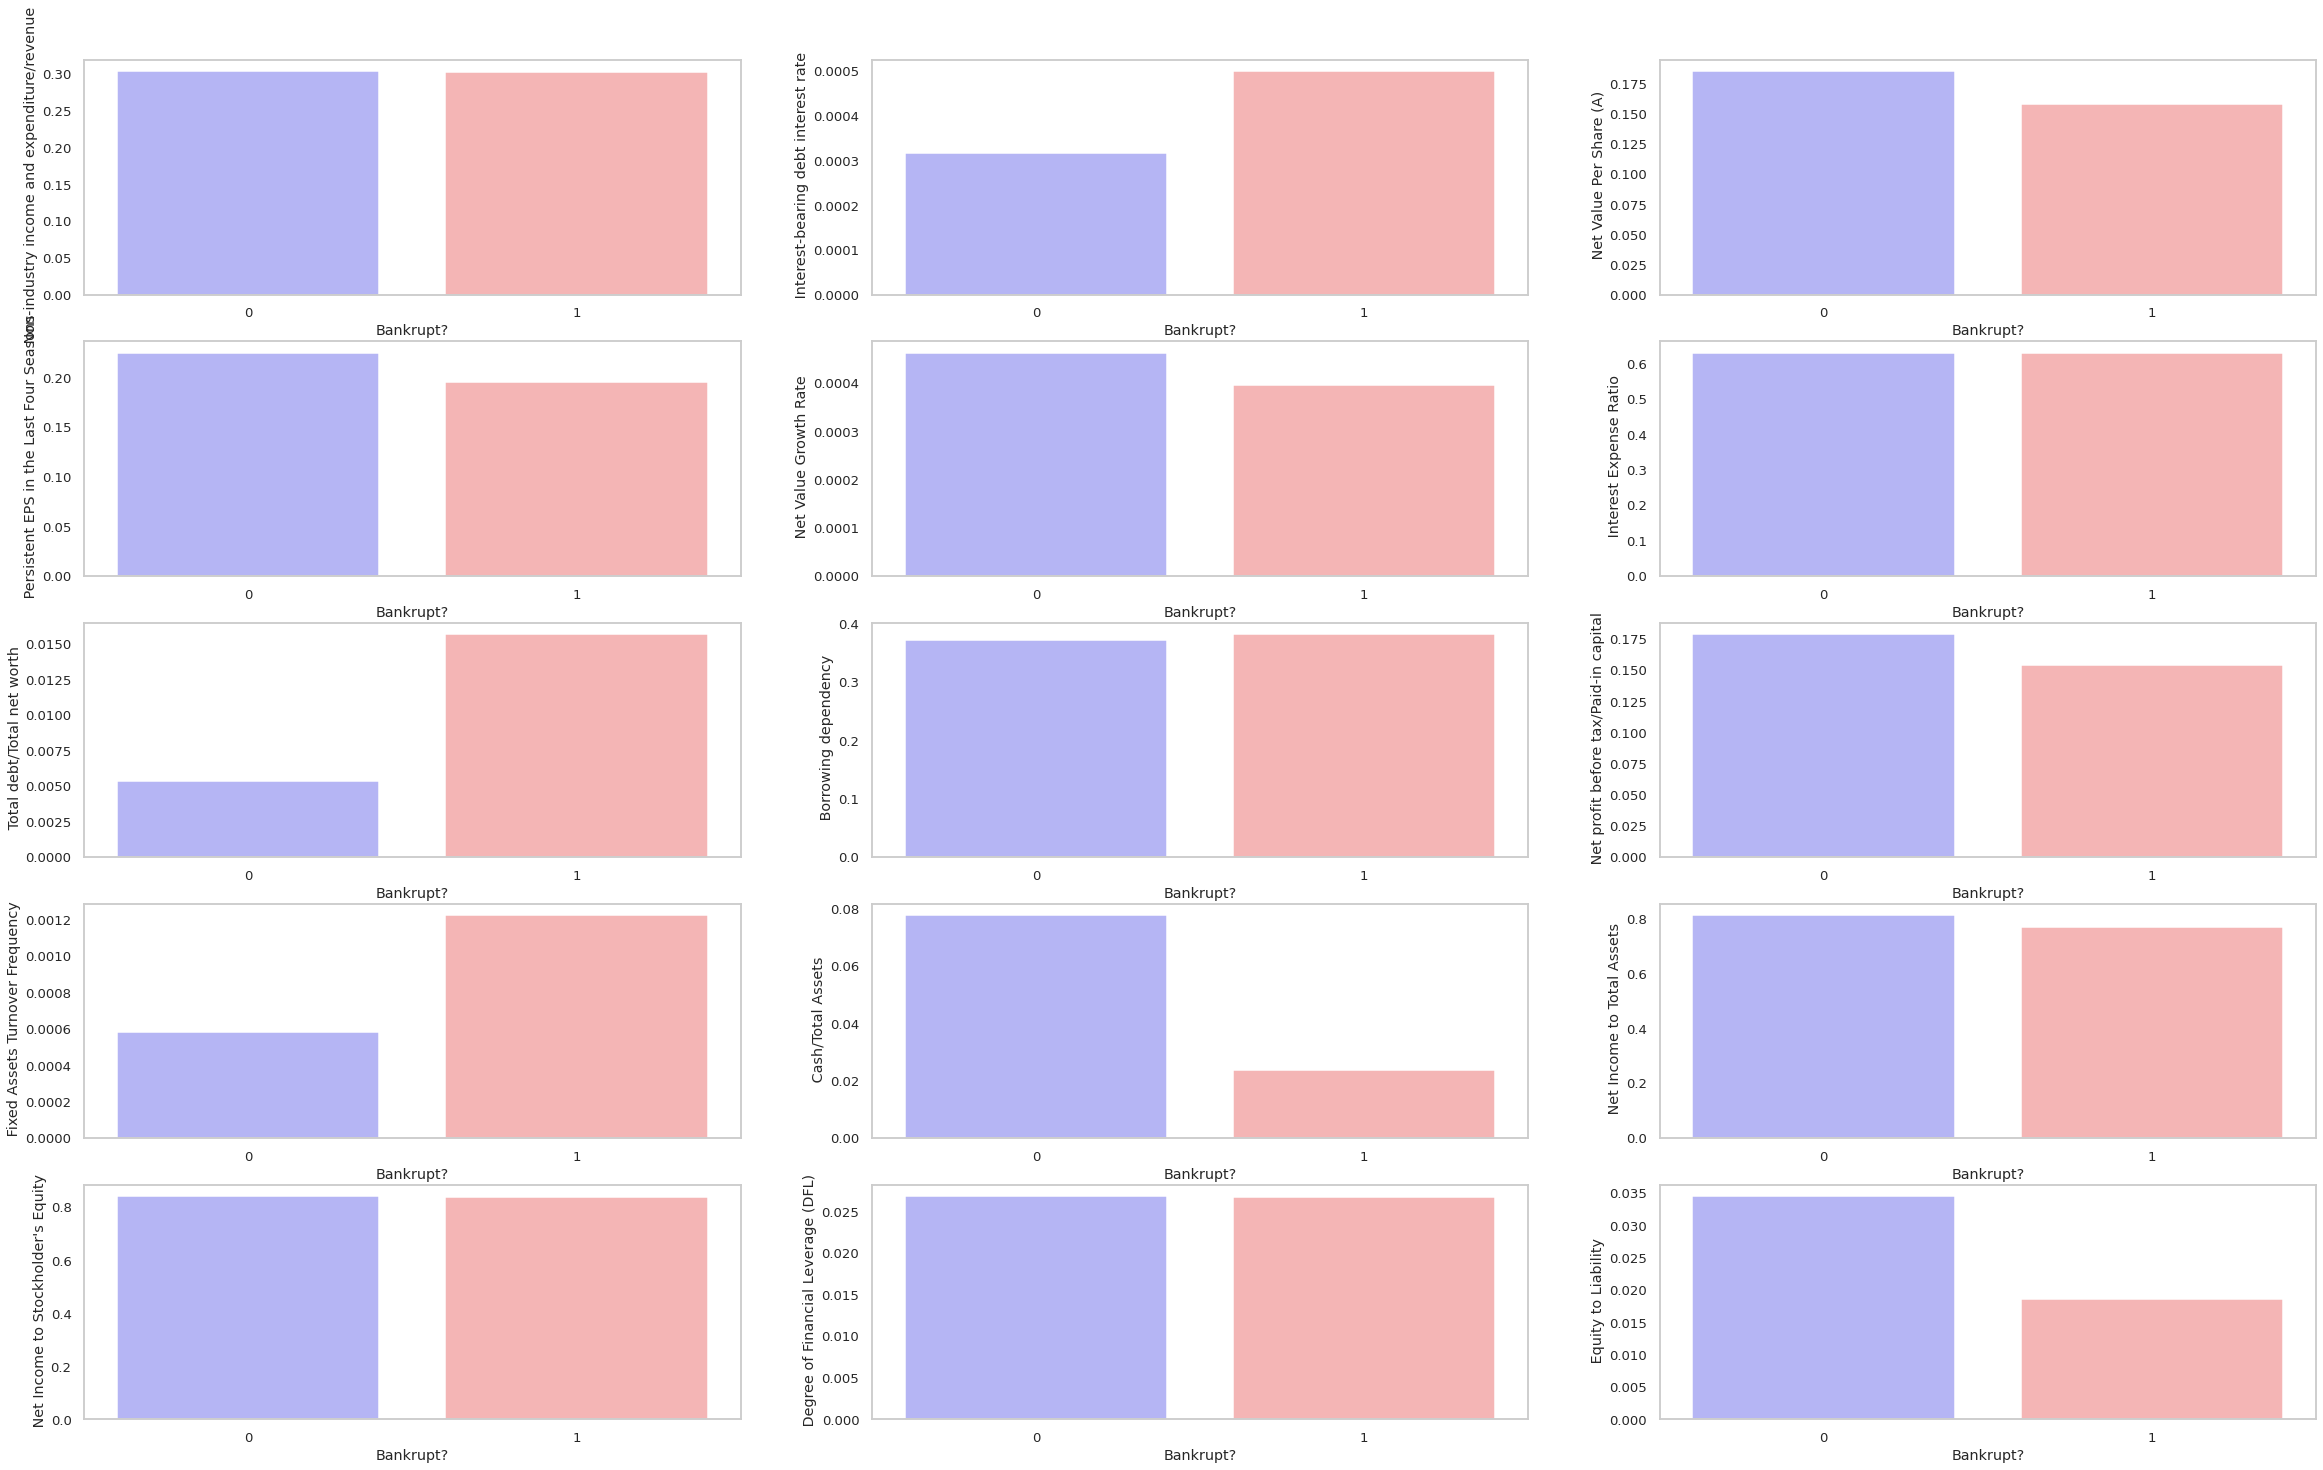

Bankrupt?   Non-industry income and expenditure/revenue  \
0          0                                      0.303527   
1          1                                      0.303347   

    Interest-bearing debt interest rate   Net Value Per Share (A)  \
0                              0.000317                  0.185074   
1                              0.000499                  0.158021   

    Persistent EPS in the Last Four Seasons   Net Value Growth Rate  \
0                                  0.225111                0.000463   
1                                  0.195944                0.000396   

    Interest Expense Ratio   Total debt/Total net worth  \
0                 0.630703                     0.005377   
1                 0.630283                     0.015723   

    Borrowing dependency   Net profit before tax/Paid-in capital  \
0               0.372474                                0.179021   
1               0.382655                                0.154012   

    Fixed Assets Turnover Frequency   Cash/Total Assets  \
0                          0.000583            0.077684   
1                          0.001225            0.023755   

    Net Income to Total Assets   Net Income to Stockholder's Equity  \
0                     0.811492                             0.841232   
1                     0.766297                             0.836707   

    Degree of Financial Leverage (DFL)   Equity to Liability  
0                             0.026810              0.034486  
1                             0.026689              0.018662

In [67]:
# Transform Your data
central = data_df.groupby('Bankrupt?').median().reset_index()
features = list(central.keys()[1:])

fig, ax = plt.subplots(5,3, figsize=(40,25))

ax = ax.ravel()
position = 0

for i in features:
    sns.barplot(data=central, x='Bankrupt?', y=i, ax=ax[position], palette='bwr')
    position += 1
    
plt.show()
display(central)

### 6. Data Scaling

In [68]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##### Which method have you used to scale you data and why?

When you are using an algorithm that assumes your features have a similar range, you should use feature scaling.

If the ranges of your features differ much then you should use feature scaling. If the range does not vary a lot like one of them is between 0 and 2 and the other one is between -1 and 0.5 then you can leave them as it's. However, you should use feature scaling if the ranges are, for example, between -2 and 2 and between -100 and 100.

Use Standardization when your data follows Gaussian distribution. Use Normalization when your data does not follow Gaussian distribution.

So, in my data only Account Length column having large data difference and following gaussian distribution. That's why, I have used standardization using standardscaler.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

We have a problem here with the huge dimensionality so we have reduced the dimensions for effectiveness.

In [69]:
# DImensionality Reduction (If needed)
data_df.head()     

Non-industry income and expenditure/revenue  \
0                                      0.302646   
1                                      0.303556   
2                                      0.302035   
3                                      0.303350   
4                                      0.303475   

    Interest-bearing debt interest rate   Net Value Per Share (A)  \
0                              0.000725                  0.147950   
1                              0.000647                  0.182251   
2                              0.000790                  0.177911   
3                              0.000449                  0.154187   
4                              0.000686                  0.167502   

    Persistent EPS in the Last Four Seasons   Net Value Growth Rate  \
0                                  0.169141                0.000327   
1                                  0.208944                0.000443   
2                                  0.180581                0.000396   
3                                  0.193722                0.000382   
4                                  0.212537                0.000439   

    Interest Expense Ratio   Total debt/Total net worth  \
0                 0.629951                     0.021266   
1                 0.635172                     0.012502   
2                 0.629631                     0.021248   
3                 0.630228                     0.009572   
4                 0.636055                     0.005150   

    Borrowing dependency   Net profit before tax/Paid-in capital  \
0               0.390284                                0.137757   
1               0.376760                                0.168962   
2               0.379093                                0.148036   
3               0.379743                                0.147561   
4               0.375025                                0.167461   

    Fixed Assets Turnover Frequency   Cash/Total Assets  \
0                      1.165007e-04            0.004094   
1                      7.190000e+08            0.014948   
2                      2.650000e+09            0.000991   
3                      9.150000e+09            0.018851   
4                      2.935211e-04            0.014161   

    Net Income to Total Assets   Net Income to Stockholder's Equity  \
0                     0.716845                             0.827890   
1                     0.795297                             0.839969   
2                     0.774670                             0.836774   
3                     0.739555                             0.834697   
4                     0.795016                             0.839973   

    Degree of Financial Leverage (DFL)   Equity to Liability  Bankrupt?  
0                             0.026601              0.016469          1  
1                             0.264577              0.020794          1  
2                             0.026555              0.016474          1  
3                             0.026697              0.023982          1  
4                             0.024752              0.035490          1

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We have used RFE on our dataset to reduce the dimensions because since we have so many features it is best suited and also we should take it's help to select the top features affecting the target variable.

Conclusions -

Companies with:

high "Interest-bearing debt interest rate" tend to go bankrupt (≈ 0.000499)

high "Total debt/Total net worth" tend to go bankrupt (≈ 0.015723)

high "Fixed Assets Turnover Frequency" tend to go bankrupt (≈ 0.001225)

low "Cash/Total Assets" tend to go bankrupt (≈ 0.023755)

low "Equity to Liability" tend to go bankrupt (≈ 0.018662)

Also, These indicators should be enough to build a reliable model since the trend is very clear.

### 8. Data Splitting

In [70]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(
    data_df.drop(labels=['Bankrupt?'], axis=1),
    data_df['Bankrupt?'],
    test_size=0.20,
    random_state=0)

X_train.shape, X_test.shape

((5455, 15), (1364, 15))

##### What data splitting ratio have you used and why? 

There are two competing concerns: with less training data, your parameter estimates have greater variance. With less testing data, your performance statistic will have greater variance. Broadly speaking you should be concerned with dividing data such that neither variance is too high, which is more to do with the absolute number of instances in each category rather than the percentage.

If you have a total of 100 instances, you're probably stuck with cross validation as no single split is going to give you satisfactory variance in your estimates. If you have 100,000 instances, it doesn't really matter whether you choose an 80:20 split or a 90:10 split (indeed you may choose to use less training data if your method is particularly computationally intensive).

You'd be surprised to find out that 80/20 is quite a commonly occurring ratio, often referred to as the Pareto principle. It's usually a safe bet if you use that ratio.

In this case the training dataset is less so i have taken 70:30 ratio.

### 9. Handling Imbalanced Dataset

In [71]:
# Chart - 1 visualization code
# Dependant Column Value Counts
print(df_company_new['Bankrupt?'].value_counts())
labels = df_company_new['Bankrupt?'].unique()
values = df_company_new['Bankrupt?'].value_counts().sort_values(ascending = True)

fig = go.Figure(data = [
    go.Pie(
    labels = labels,
    values = values,title_text = "Bankrupt Distribution",
    hole = .5)
])

fig.show()

0    6599
1     220
Name: Bankrupt?, dtype: int64


##### Do you think the dataset is imbalanced? Explain Why.

Yes we have highly imbalanced data as companies with a low 'Net profit before tax/Paid-in capital', 'Persistent EPS in the Last Four Seasons' and 'Net Value Per Share (A)' 'Borrowing dependency' tend to go bankrupt and has bankrupt companies distributed through all it's range.

Imbalanced dataset is relevant primarily in the context of supervised machine learning involving two or more classes.

Imbalance means that the number of data points available for different the classes is different: If there are two classes, then balanced data would mean 50% points for each of the class. For most machine learning techniques, little imbalance is not a problem. So, if there are 60% points for one class and 40% for the other class, it should not cause any significant performance degradation. Only when the class imbalance is high, e.g. 90% points for one class and 10% for the other, standard optimization criteria or performance measures may not be as effective and would need modification.

In our case the dataset dependent column data ratio is 70:30. So, during model creating it's obvios that there will be bias and having a great chance of predicting the majority one so frequently. So the dataset should be balanced before it going for the model creation part.

In [72]:
# Handling Imbalanced Dataset (If needed)
# Handling imbalance dataset using SMOTE
sm = SMOTE(random_state=42) 
X_train, y_train = sm.fit_resample(X_train, y_train)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (10562, 15)
Number transactions y_train dataset:  (10562,)
Number transactions X_test dataset:  (1364, 15)
Number transactions y_test dataset:  (1364,)


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I have used SMOTE (Synthetic Minority Over-sampling technique) for balanced the 85:15 dataset.

SMOTE is a technique in machine learning for dealing with issues that arise when working with an unbalanced data set. In practice, unbalanced data sets are common and most ML algorithms are highly prone to unbalanced data so we need to improve their performance by using techniques like SMOTE.

To address this disparity, balancing schemes that augment the data to make it more balanced before training the classifier were proposed. Oversampling the minority class by duplicating minority samples or undersampling the majority class is the simplest balancing method.

The idea of incorporating synthetic minority samples into tabular data was first proposed in SMOTE, where synthetic minority samples are generated by interpolating pairs of original minority points.

SMOTE is a data augmentation algorithm that creates synthetic data points from raw data. SMOTE can be thought of as a more sophisticated version of oversampling or a specific data augmentation algorithm.

SMOTE has the advantage of not creating duplicate data points, but rather synthetic data points that differ slightly from the original data points. SMOTE is a superior oversampling option.

That's why for lots of advantages, I have used SMOTE technique for balancing the dataset.

## ***7. ML Model Implementation***

### ML Model - 1

In [83]:
# ML Model - 1 Implementation
clf = LogisticRegression(fit_intercept=True, max_iter=10000)
# Fit the Algorithm
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [84]:
# Checking the coefficients
clf.coef_

array([[-5.19342913e-15, -3.50297722e-09, -5.84435561e-15,
        -7.39748385e-15,  2.47195351e-08, -1.06877104e-14,
        -4.91328634e-08, -4.83566512e-15, -6.20627727e-15,
         1.20224794e-10, -8.80026832e-15, -1.97544321e-14,
        -1.53174997e-14, -4.98803102e-16, -3.15291054e-15]])

In [85]:
# Checking the intercept value
clf.intercept_

array([-1.68353852e-14])

In [86]:
# Predict on the model
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)     

In [91]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [92]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6148456731679606
The accuracy on test data is  0.8020527859237536


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[4370  911]
 [3157 2124]]


Text(0.5, 6.5, 'Predicted labels')

Text(24.5, 0.5, 'True labels')

Text(0.5, 1.0, 'Confusion Matrix')

[Text(0.5, 0, 'Stable'), Text(1.5, 0, 'Unstable')]

[Text(0, 0.5, 'Stable'), Text(0, 1.5, 'Unstable')]

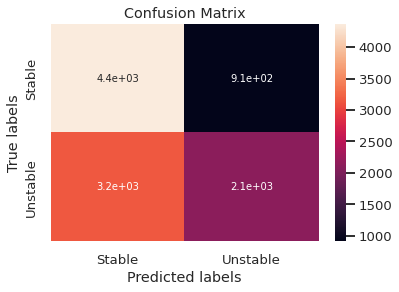

In [93]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for both train and test

labels = ['Stable', 'Unstable']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[1081  237]
 [  33   13]]


Text(0.5, 6.5, 'Predicted labels')

Text(24.5, 0.5, 'True labels')

Text(0.5, 1.0, 'Confusion Matrix')

[Text(0.5, 0, 'Stable'), Text(1.5, 0, 'Unstable')]

[Text(0, 0.5, 'Stable'), Text(0, 1.5, 'Unstable')]

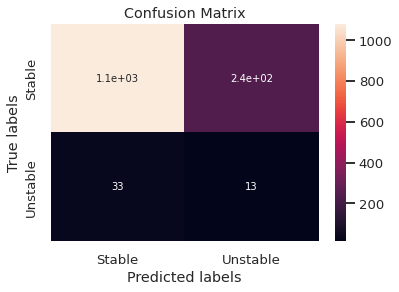

In [94]:
# Get the confusion matrix for both train and test

labels = ['Stable', 'Unstable']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [95]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.83      0.58      0.68      7527
           1       0.40      0.70      0.51      3035

    accuracy                           0.61     10562
   macro avg       0.61      0.64      0.60     10562
weighted avg       0.71      0.61      0.63     10562

 
roc_auc_score
0.6148456731679606


In [96]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1114
           1       0.28      0.05      0.09       250

    accuracy                           0.80      1364
   macro avg       0.55      0.51      0.49      1364
weighted avg       0.72      0.80      0.74      1364

 
roc_auc_score
0.551395394867058


I used Logistic regression algorithm to create the model and the results were not good.

For training dataset, i found precision of 86% and recall of 88% and f1-score of 87% for stable company data. BUt, I am also interested to see the result for unstable company as I got precision of 88% and recall of 87% and f1-score of 87%. Accuracy is 87% and average percision, recall & f1_score are 87%, 87% and 87% respectively with a roc auc score of 87%.

For testing dataset, i found precision of 87% and recall of 99% and f1-score of 93% for stable company data. BUt, I am also interested to see the result for unstable company as I got precision of 83% and recall of 18% and f1-score of 30%. Accuracy is 87% and average percision, recall & f1_score are 85%, 59% and 62% respectively with a roc auc score of 84%.

Next tryting to improving the score by using hyperparameter tuning technique.

#### 2. Cross- Validation & Hyperparameter Tuning

In [97]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
model = LogisticRegression(max_iter=10000)
solvers = ['lbfgs']
penalty = ['10','l2','14','16','20','18']
c_values = [1000,100, 10, 1.0, 0.1, 0.01,0.001]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

# Fit the Algorithm
grid_result=grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


# Predict on the model
# Get the predicted classes
train_class_preds = grid_result.predict(X_train)
test_class_preds = grid_result.predict(X_test)

Best: 0.504554 using {'C': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}


In [98]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.83      0.58      0.68      7527
           1       0.40      0.70      0.51      3035

    accuracy                           0.61     10562
   macro avg       0.61      0.64      0.60     10562
weighted avg       0.71      0.61      0.63     10562

 
roc_auc_score
0.6148456731679606


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For training dataset, I found precision of 86% and recall of 88% and f1-score of 87% for Stable companies data. BUt, I am also interested to see the result for unstable companies result as I got precision of 88% and recall of 87% and f1-score of 87%. Accuracy is 87% and average percision, recall & f1_score are 87%, 87% and 87% respectively with a roc auc score of 87%.

No improvement seen in Training Dataset.

For testing dataset, I found precision of 87% and recall of 99% and f1-score of 93% for Stable company data. BUt, I am also interested to see the result for unstable companies result as I got precision of 83% and recall of 19% and f1-score of 30%. Accuracy is 87% and average percision, recall & f1_score are 85%, 59% and 62% respectively with a roc auc score of 84%.

No improvement seen in testing data as well except improvement in f1 score of 1%.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [76]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [77]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [78]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [79]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [80]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [81]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [82]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***